# Connect Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Necessary Installations

In [ ]:
import pandas as pd

In [ ]:
!pip install simpletransformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 249 kB 9.9 MB/s 
     |████████████████████████████████| 6.6 MB 43.5 MB/s 
     |████████████████████████████████| 4.7 MB 63.5 MB/s 
     |████████████████████████████████| 9.1 MB 45.6 MB/s 
     |████████████████████████████████| 1.8 MB 45.1 MB/s 
     |████████████████████████████████| 365 kB 71.4 MB/s 
     |████████████████████████████████| 43 kB 2.3 MB/s 
     |████████████████████████████████| 1.3 MB 46.5 MB/s 
     |████████████████████████████████| 596 kB 46.7 MB/s 
     |████████████████████████████████| 101 kB 12.3 MB/s 
     |████████████████████████████████| 181 kB 56.3 MB/s 
     |████████████████████████████████| 157 kB 58.2 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
     |████████████████████████████████| 157 kB 39.1 MB/s 
     |████████████████████████████████| 157 kB 58.8 MB/s 
     |██████████████████████████████

In [ ]:
# emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
!pip install emoji==0.6.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 51 kB 4.3 MB/s 
  Created wheel for emoji: filename=emoji-0.6.0-py3-none-any.whl size=49734 sha256=7d246ed392b8067206efc3c964ddaef3d9a3ea1245e1d9da5b51da544ff558ab
  Stored in directory: /root/.cache/pip/wheels/4e/bf/6b/2e22b3708d14bf6384f862db539b044d6931bd6b14ad3c9adc
Successfully built emoji


In [ ]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 8.4 MB/s 


# Load the pre-trained Model
It was trained on Twitter Dataset

In [ ]:
# loading trained model
import pickle
with open('/content/drive/MyDrive/Trained_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Load Validation and Test Dataset

In [ ]:
df_val1 = pd.read_excel('/content/drive/MyDrive/Reddit Migraine Dataset/Swati folder/Reddit_validation_dataset.xlsx')
df_val2 = pd.read_excel('/content/drive/MyDrive/Reddit Migraine Dataset/2985 Dataset/Reddit_test_diff_dataset.xlsx') # This is also considered as test dataset for now, remember that! 
df_val3 = pd.read_excel('/content/drive/MyDrive/Reddit Migraine Dataset/2985 Dataset/Reddit_validation_diff_dataset.xlsx')

df_test = pd.read_excel('/content/drive/MyDrive/Reddit Migraine Dataset/Reddit_test_dataset Manual Annotation.xlsx')

frames = [df_val1, df_val2, df_val3]
df_val = pd.concat(frames)

df_val = df_val.reset_index(drop=True)

In [ ]:
df_val.columns

Index(['id', 'text'], dtype='object')

In [ ]:
# df_val.drop(df_val.index[df_val['id'] == 'li8y5a'], inplace=True) # This is a dirty entry and so should be deleted
# df_val.drop(df_val.index[df_val['id'] == 'k00q2a'], inplace=True)  # This is a dirty entry and so should be deleted

In [ ]:
# df_val = df_val.reset_index(drop=True)

In [ ]:
# import nltk
# nltk.download('punkt')

In [ ]:
# nltk.download('stopwords')

In [ ]:
# from nltk.corpus import stopwords
# stop = stopwords.words('english')

In [ ]:
# df_val['text_w/o_stopwords'] = df_val['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
# df_val['text_w/o_punctuations'] = df_val['text_w/o_stopwords'].str.replace(r'[^\w\s]+', '')

In [ ]:
n = 128
df_val['split_text'] = ''
for i in range(len(df_val)):
  current_text = df_val['text'][i]
  current_text = current_text.split()
  current_text_split = [' '.join(current_text[j:j+n]) for j in range(0,len(current_text),n)]

  df_val['split_text'][i] = current_text_split

In [ ]:
df_val.shape

(2683, 3)

# Preditions on Validation Dataset

In [ ]:
df_val['predictions'] = ''
df_val['Model Label'] = ''

In [ ]:
# FOR df_val DATASET
for i in range(len(df_val)):
  print("***********LOOP NO:",i,"BEGINS***********")
  curr_texts=df_val['split_text'][i]
  predictions, raw_outputs = model.predict(curr_texts)
  df_val['predictions'][i] = predictions
  
  if (((predictions == 1).sum() > (predictions == 0).sum()) or ((predictions == 1).sum() == (predictions == 0).sum())):
    df_val['Model Label'][i] = 1
  else:
    df_val['Model Label'][i] = 0
  
  print("***********LOOP NO:",i,"ENDS HERE***********\n\n")

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 649 ENDS HERE***********


***********LOOP NO: 650 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 650 ENDS HERE***********


***********LOOP NO: 651 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 651 ENDS HERE***********


***********LOOP NO: 652 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 652 ENDS HERE***********


***********LOOP NO: 653 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 653 ENDS HERE***********


***********LOOP NO: 654 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 654 ENDS HERE***********


***********LOOP NO: 655 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 655 ENDS HERE***********


***********LOOP NO: 656 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 656 ENDS HERE***********


***********LOOP NO: 657 BEGINS***********


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 657 ENDS HERE***********


***********LOOP NO: 658 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 658 ENDS HERE***********


***********LOOP NO: 659 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 659 ENDS HERE***********


***********LOOP NO: 660 BEGINS***********


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 660 ENDS HERE***********


***********LOOP NO: 661 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 661 ENDS HERE***********


***********LOOP NO: 662 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 662 ENDS HERE***********


***********LOOP NO: 663 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 663 ENDS HERE***********


***********LOOP NO: 664 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 664 ENDS HERE***********


***********LOOP NO: 665 BEGINS***********


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 665 ENDS HERE***********


***********LOOP NO: 666 BEGINS***********


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 666 ENDS HERE***********


***********LOOP NO: 667 BEGINS***********


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 667 ENDS HERE***********


***********LOOP NO: 668 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 668 ENDS HERE***********


***********LOOP NO: 669 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 669 ENDS HERE***********


***********LOOP NO: 670 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 670 ENDS HERE***********


***********LOOP NO: 671 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 671 ENDS HERE***********


***********LOOP NO: 672 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 672 ENDS HERE***********


***********LOOP NO: 673 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 673 ENDS HERE***********


***********LOOP NO: 674 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 674 ENDS HERE***********


***********LOOP NO: 675 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 675 ENDS HERE***********


***********LOOP NO: 676 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 676 ENDS HERE***********


***********LOOP NO: 677 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 677 ENDS HERE***********


***********LOOP NO: 678 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 678 ENDS HERE***********


***********LOOP NO: 679 BEGINS***********


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 679 ENDS HERE***********


***********LOOP NO: 680 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 680 ENDS HERE***********


***********LOOP NO: 681 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 681 ENDS HERE***********


***********LOOP NO: 682 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 682 ENDS HERE***********


***********LOOP NO: 683 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 683 ENDS HERE***********


***********LOOP NO: 684 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 684 ENDS HERE***********


***********LOOP NO: 685 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 685 ENDS HERE***********


***********LOOP NO: 686 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 686 ENDS HERE***********


***********LOOP NO: 687 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 687 ENDS HERE***********


***********LOOP NO: 688 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 688 ENDS HERE***********


***********LOOP NO: 689 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 689 ENDS HERE***********


***********LOOP NO: 690 BEGINS***********


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 690 ENDS HERE***********


***********LOOP NO: 691 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 691 ENDS HERE***********


***********LOOP NO: 692 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 692 ENDS HERE***********


***********LOOP NO: 693 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 693 ENDS HERE***********


***********LOOP NO: 694 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 694 ENDS HERE***********


***********LOOP NO: 695 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 695 ENDS HERE***********


***********LOOP NO: 696 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 696 ENDS HERE***********


***********LOOP NO: 697 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 697 ENDS HERE***********


***********LOOP NO: 698 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 698 ENDS HERE***********


***********LOOP NO: 699 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 699 ENDS HERE***********


***********LOOP NO: 700 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 700 ENDS HERE***********


***********LOOP NO: 701 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 701 ENDS HERE***********


***********LOOP NO: 702 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 702 ENDS HERE***********


***********LOOP NO: 703 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 703 ENDS HERE***********


***********LOOP NO: 704 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 704 ENDS HERE***********


***********LOOP NO: 705 BEGINS***********


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 705 ENDS HERE***********


***********LOOP NO: 706 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 706 ENDS HERE***********


***********LOOP NO: 707 BEGINS***********


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 707 ENDS HERE***********


***********LOOP NO: 708 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 708 ENDS HERE***********


***********LOOP NO: 709 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 709 ENDS HERE***********


***********LOOP NO: 710 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 710 ENDS HERE***********


***********LOOP NO: 711 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 711 ENDS HERE***********


***********LOOP NO: 712 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 712 ENDS HERE***********


***********LOOP NO: 713 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 713 ENDS HERE***********


***********LOOP NO: 714 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 714 ENDS HERE***********


***********LOOP NO: 715 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 715 ENDS HERE***********


***********LOOP NO: 716 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 716 ENDS HERE***********


***********LOOP NO: 717 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 717 ENDS HERE***********


***********LOOP NO: 718 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 718 ENDS HERE***********


***********LOOP NO: 719 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 719 ENDS HERE***********


***********LOOP NO: 720 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 720 ENDS HERE***********


***********LOOP NO: 721 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 721 ENDS HERE***********


***********LOOP NO: 722 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 722 ENDS HERE***********


***********LOOP NO: 723 BEGINS***********


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 723 ENDS HERE***********


***********LOOP NO: 724 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 724 ENDS HERE***********


***********LOOP NO: 725 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 725 ENDS HERE***********


***********LOOP NO: 726 BEGINS***********


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 726 ENDS HERE***********


***********LOOP NO: 727 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 727 ENDS HERE***********


***********LOOP NO: 728 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 728 ENDS HERE***********


***********LOOP NO: 729 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 729 ENDS HERE***********


***********LOOP NO: 730 BEGINS***********


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 730 ENDS HERE***********


***********LOOP NO: 731 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 731 ENDS HERE***********


***********LOOP NO: 732 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 732 ENDS HERE***********


***********LOOP NO: 733 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 733 ENDS HERE***********


***********LOOP NO: 734 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 734 ENDS HERE***********


***********LOOP NO: 735 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 735 ENDS HERE***********


***********LOOP NO: 736 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 736 ENDS HERE***********


***********LOOP NO: 737 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 737 ENDS HERE***********


***********LOOP NO: 738 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 738 ENDS HERE***********


***********LOOP NO: 739 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 739 ENDS HERE***********


***********LOOP NO: 740 BEGINS***********


  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

***********LOOP NO: 740 ENDS HERE***********


***********LOOP NO: 741 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 741 ENDS HERE***********


***********LOOP NO: 742 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 742 ENDS HERE***********


***********LOOP NO: 743 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 743 ENDS HERE***********


***********LOOP NO: 744 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 744 ENDS HERE***********


***********LOOP NO: 745 BEGINS***********


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 745 ENDS HERE***********


***********LOOP NO: 746 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 746 ENDS HERE***********


***********LOOP NO: 747 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 747 ENDS HERE***********


***********LOOP NO: 748 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 748 ENDS HERE***********


***********LOOP NO: 749 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 749 ENDS HERE***********


***********LOOP NO: 750 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 750 ENDS HERE***********


***********LOOP NO: 751 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 751 ENDS HERE***********


***********LOOP NO: 752 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 752 ENDS HERE***********


***********LOOP NO: 753 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 753 ENDS HERE***********


***********LOOP NO: 754 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 754 ENDS HERE***********


***********LOOP NO: 755 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 755 ENDS HERE***********


***********LOOP NO: 756 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 756 ENDS HERE***********


***********LOOP NO: 757 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 757 ENDS HERE***********


***********LOOP NO: 758 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 758 ENDS HERE***********


***********LOOP NO: 759 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 759 ENDS HERE***********


***********LOOP NO: 760 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 760 ENDS HERE***********


***********LOOP NO: 761 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 761 ENDS HERE***********


***********LOOP NO: 762 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 762 ENDS HERE***********


***********LOOP NO: 763 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 763 ENDS HERE***********


***********LOOP NO: 764 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 764 ENDS HERE***********


***********LOOP NO: 765 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 765 ENDS HERE***********


***********LOOP NO: 766 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 766 ENDS HERE***********


***********LOOP NO: 767 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 767 ENDS HERE***********


***********LOOP NO: 768 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 768 ENDS HERE***********


***********LOOP NO: 769 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 769 ENDS HERE***********


***********LOOP NO: 770 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 770 ENDS HERE***********


***********LOOP NO: 771 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 771 ENDS HERE***********


***********LOOP NO: 772 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 772 ENDS HERE***********


***********LOOP NO: 773 BEGINS***********


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 773 ENDS HERE***********


***********LOOP NO: 774 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 774 ENDS HERE***********


***********LOOP NO: 775 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 775 ENDS HERE***********


***********LOOP NO: 776 BEGINS***********


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 776 ENDS HERE***********


***********LOOP NO: 777 BEGINS***********


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 777 ENDS HERE***********


***********LOOP NO: 778 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 778 ENDS HERE***********


***********LOOP NO: 779 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 779 ENDS HERE***********


***********LOOP NO: 780 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 780 ENDS HERE***********


***********LOOP NO: 781 BEGINS***********


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 781 ENDS HERE***********


***********LOOP NO: 782 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 782 ENDS HERE***********


***********LOOP NO: 783 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 783 ENDS HERE***********


***********LOOP NO: 784 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 784 ENDS HERE***********


***********LOOP NO: 785 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 785 ENDS HERE***********


***********LOOP NO: 786 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 786 ENDS HERE***********


***********LOOP NO: 787 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 787 ENDS HERE***********


***********LOOP NO: 788 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 788 ENDS HERE***********


***********LOOP NO: 789 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 789 ENDS HERE***********


***********LOOP NO: 790 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 790 ENDS HERE***********


***********LOOP NO: 791 BEGINS***********


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 791 ENDS HERE***********


***********LOOP NO: 792 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 792 ENDS HERE***********


***********LOOP NO: 793 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 793 ENDS HERE***********


***********LOOP NO: 794 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 794 ENDS HERE***********


***********LOOP NO: 795 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 795 ENDS HERE***********


***********LOOP NO: 796 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 796 ENDS HERE***********


***********LOOP NO: 797 BEGINS***********


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 797 ENDS HERE***********


***********LOOP NO: 798 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 798 ENDS HERE***********


***********LOOP NO: 799 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 799 ENDS HERE***********


***********LOOP NO: 800 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 800 ENDS HERE***********


***********LOOP NO: 801 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 801 ENDS HERE***********


***********LOOP NO: 802 BEGINS***********


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 802 ENDS HERE***********


***********LOOP NO: 803 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 803 ENDS HERE***********


***********LOOP NO: 804 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 804 ENDS HERE***********


***********LOOP NO: 805 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 805 ENDS HERE***********


***********LOOP NO: 806 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 806 ENDS HERE***********


***********LOOP NO: 807 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 807 ENDS HERE***********


***********LOOP NO: 808 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 808 ENDS HERE***********


***********LOOP NO: 809 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 809 ENDS HERE***********


***********LOOP NO: 810 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 810 ENDS HERE***********


***********LOOP NO: 811 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 811 ENDS HERE***********


***********LOOP NO: 812 BEGINS***********


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 812 ENDS HERE***********


***********LOOP NO: 813 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 813 ENDS HERE***********


***********LOOP NO: 814 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 814 ENDS HERE***********


***********LOOP NO: 815 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 815 ENDS HERE***********


***********LOOP NO: 816 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 816 ENDS HERE***********


***********LOOP NO: 817 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 817 ENDS HERE***********


***********LOOP NO: 818 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 818 ENDS HERE***********


***********LOOP NO: 819 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 819 ENDS HERE***********


***********LOOP NO: 820 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 820 ENDS HERE***********


***********LOOP NO: 821 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 821 ENDS HERE***********


***********LOOP NO: 822 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 822 ENDS HERE***********


***********LOOP NO: 823 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 823 ENDS HERE***********


***********LOOP NO: 824 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 824 ENDS HERE***********


***********LOOP NO: 825 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 825 ENDS HERE***********


***********LOOP NO: 826 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 826 ENDS HERE***********


***********LOOP NO: 827 BEGINS***********


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 827 ENDS HERE***********


***********LOOP NO: 828 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 828 ENDS HERE***********


***********LOOP NO: 829 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 829 ENDS HERE***********


***********LOOP NO: 830 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 830 ENDS HERE***********


***********LOOP NO: 831 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 831 ENDS HERE***********


***********LOOP NO: 832 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 832 ENDS HERE***********


***********LOOP NO: 833 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 833 ENDS HERE***********


***********LOOP NO: 834 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 834 ENDS HERE***********


***********LOOP NO: 835 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 835 ENDS HERE***********


***********LOOP NO: 836 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 836 ENDS HERE***********


***********LOOP NO: 837 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 837 ENDS HERE***********


***********LOOP NO: 838 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 838 ENDS HERE***********


***********LOOP NO: 839 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 839 ENDS HERE***********


***********LOOP NO: 840 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 840 ENDS HERE***********


***********LOOP NO: 841 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 841 ENDS HERE***********


***********LOOP NO: 842 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 842 ENDS HERE***********


***********LOOP NO: 843 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 843 ENDS HERE***********


***********LOOP NO: 844 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 844 ENDS HERE***********


***********LOOP NO: 845 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 845 ENDS HERE***********


***********LOOP NO: 846 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 846 ENDS HERE***********


***********LOOP NO: 847 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 847 ENDS HERE***********


***********LOOP NO: 848 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 848 ENDS HERE***********


***********LOOP NO: 849 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 849 ENDS HERE***********


***********LOOP NO: 850 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 850 ENDS HERE***********


***********LOOP NO: 851 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 851 ENDS HERE***********


***********LOOP NO: 852 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 852 ENDS HERE***********


***********LOOP NO: 853 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 853 ENDS HERE***********


***********LOOP NO: 854 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 854 ENDS HERE***********


***********LOOP NO: 855 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 855 ENDS HERE***********


***********LOOP NO: 856 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 856 ENDS HERE***********


***********LOOP NO: 857 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 857 ENDS HERE***********


***********LOOP NO: 858 BEGINS***********


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 858 ENDS HERE***********


***********LOOP NO: 859 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 859 ENDS HERE***********


***********LOOP NO: 860 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 860 ENDS HERE***********


***********LOOP NO: 861 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 861 ENDS HERE***********


***********LOOP NO: 862 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 862 ENDS HERE***********


***********LOOP NO: 863 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 863 ENDS HERE***********


***********LOOP NO: 864 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 864 ENDS HERE***********


***********LOOP NO: 865 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 865 ENDS HERE***********


***********LOOP NO: 866 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 866 ENDS HERE***********


***********LOOP NO: 867 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 867 ENDS HERE***********


***********LOOP NO: 868 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 868 ENDS HERE***********


***********LOOP NO: 869 BEGINS***********


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 869 ENDS HERE***********


***********LOOP NO: 870 BEGINS***********


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 870 ENDS HERE***********


***********LOOP NO: 871 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 871 ENDS HERE***********


***********LOOP NO: 872 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 872 ENDS HERE***********


***********LOOP NO: 873 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 873 ENDS HERE***********


***********LOOP NO: 874 BEGINS***********


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 874 ENDS HERE***********


***********LOOP NO: 875 BEGINS***********


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 875 ENDS HERE***********


***********LOOP NO: 876 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 876 ENDS HERE***********


***********LOOP NO: 877 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 877 ENDS HERE***********


***********LOOP NO: 878 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 878 ENDS HERE***********


***********LOOP NO: 879 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 879 ENDS HERE***********


***********LOOP NO: 880 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 880 ENDS HERE***********


***********LOOP NO: 881 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 881 ENDS HERE***********


***********LOOP NO: 882 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 882 ENDS HERE***********


***********LOOP NO: 883 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 883 ENDS HERE***********


***********LOOP NO: 884 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 884 ENDS HERE***********


***********LOOP NO: 885 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 885 ENDS HERE***********


***********LOOP NO: 886 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 886 ENDS HERE***********


***********LOOP NO: 887 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 887 ENDS HERE***********


***********LOOP NO: 888 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 888 ENDS HERE***********


***********LOOP NO: 889 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 889 ENDS HERE***********


***********LOOP NO: 890 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 890 ENDS HERE***********


***********LOOP NO: 891 BEGINS***********


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 891 ENDS HERE***********


***********LOOP NO: 892 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 892 ENDS HERE***********


***********LOOP NO: 893 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 893 ENDS HERE***********


***********LOOP NO: 894 BEGINS***********


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 894 ENDS HERE***********


***********LOOP NO: 895 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 895 ENDS HERE***********


***********LOOP NO: 896 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 896 ENDS HERE***********


***********LOOP NO: 897 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 897 ENDS HERE***********


***********LOOP NO: 898 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 898 ENDS HERE***********


***********LOOP NO: 899 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 899 ENDS HERE***********


***********LOOP NO: 900 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 900 ENDS HERE***********


***********LOOP NO: 901 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 901 ENDS HERE***********


***********LOOP NO: 902 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 902 ENDS HERE***********


***********LOOP NO: 903 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 903 ENDS HERE***********


***********LOOP NO: 904 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 904 ENDS HERE***********


***********LOOP NO: 905 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 905 ENDS HERE***********


***********LOOP NO: 906 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 906 ENDS HERE***********


***********LOOP NO: 907 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 907 ENDS HERE***********


***********LOOP NO: 908 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 908 ENDS HERE***********


***********LOOP NO: 909 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 909 ENDS HERE***********


***********LOOP NO: 910 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 910 ENDS HERE***********


***********LOOP NO: 911 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 911 ENDS HERE***********


***********LOOP NO: 912 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 912 ENDS HERE***********


***********LOOP NO: 913 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 913 ENDS HERE***********


***********LOOP NO: 914 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 914 ENDS HERE***********


***********LOOP NO: 915 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 915 ENDS HERE***********


***********LOOP NO: 916 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 916 ENDS HERE***********


***********LOOP NO: 917 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 917 ENDS HERE***********


***********LOOP NO: 918 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 918 ENDS HERE***********


***********LOOP NO: 919 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 919 ENDS HERE***********


***********LOOP NO: 920 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 920 ENDS HERE***********


***********LOOP NO: 921 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 921 ENDS HERE***********


***********LOOP NO: 922 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 922 ENDS HERE***********


***********LOOP NO: 923 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 923 ENDS HERE***********


***********LOOP NO: 924 BEGINS***********


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 924 ENDS HERE***********


***********LOOP NO: 925 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 925 ENDS HERE***********


***********LOOP NO: 926 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 926 ENDS HERE***********


***********LOOP NO: 927 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 927 ENDS HERE***********


***********LOOP NO: 928 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 928 ENDS HERE***********


***********LOOP NO: 929 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 929 ENDS HERE***********


***********LOOP NO: 930 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 930 ENDS HERE***********


***********LOOP NO: 931 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 931 ENDS HERE***********


***********LOOP NO: 932 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 932 ENDS HERE***********


***********LOOP NO: 933 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 933 ENDS HERE***********


***********LOOP NO: 934 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 934 ENDS HERE***********


***********LOOP NO: 935 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 935 ENDS HERE***********


***********LOOP NO: 936 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 936 ENDS HERE***********


***********LOOP NO: 937 BEGINS***********


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 937 ENDS HERE***********


***********LOOP NO: 938 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 938 ENDS HERE***********


***********LOOP NO: 939 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 939 ENDS HERE***********


***********LOOP NO: 940 BEGINS***********


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 940 ENDS HERE***********


***********LOOP NO: 941 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 941 ENDS HERE***********


***********LOOP NO: 942 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 942 ENDS HERE***********


***********LOOP NO: 943 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 943 ENDS HERE***********


***********LOOP NO: 944 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 944 ENDS HERE***********


***********LOOP NO: 945 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 945 ENDS HERE***********


***********LOOP NO: 946 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 946 ENDS HERE***********


***********LOOP NO: 947 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 947 ENDS HERE***********


***********LOOP NO: 948 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 948 ENDS HERE***********


***********LOOP NO: 949 BEGINS***********


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 949 ENDS HERE***********


***********LOOP NO: 950 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 950 ENDS HERE***********


***********LOOP NO: 951 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 951 ENDS HERE***********


***********LOOP NO: 952 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 952 ENDS HERE***********


***********LOOP NO: 953 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 953 ENDS HERE***********


***********LOOP NO: 954 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 954 ENDS HERE***********


***********LOOP NO: 955 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 955 ENDS HERE***********


***********LOOP NO: 956 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 956 ENDS HERE***********


***********LOOP NO: 957 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 957 ENDS HERE***********


***********LOOP NO: 958 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 958 ENDS HERE***********


***********LOOP NO: 959 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 959 ENDS HERE***********


***********LOOP NO: 960 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 960 ENDS HERE***********


***********LOOP NO: 961 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 961 ENDS HERE***********


***********LOOP NO: 962 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 962 ENDS HERE***********


***********LOOP NO: 963 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 963 ENDS HERE***********


***********LOOP NO: 964 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 964 ENDS HERE***********


***********LOOP NO: 965 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 965 ENDS HERE***********


***********LOOP NO: 966 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 966 ENDS HERE***********


***********LOOP NO: 967 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 967 ENDS HERE***********


***********LOOP NO: 968 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 968 ENDS HERE***********


***********LOOP NO: 969 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 969 ENDS HERE***********


***********LOOP NO: 970 BEGINS***********


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 970 ENDS HERE***********


***********LOOP NO: 971 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 971 ENDS HERE***********


***********LOOP NO: 972 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 972 ENDS HERE***********


***********LOOP NO: 973 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 973 ENDS HERE***********


***********LOOP NO: 974 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 974 ENDS HERE***********


***********LOOP NO: 975 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 975 ENDS HERE***********


***********LOOP NO: 976 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 976 ENDS HERE***********


***********LOOP NO: 977 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 977 ENDS HERE***********


***********LOOP NO: 978 BEGINS***********


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 978 ENDS HERE***********


***********LOOP NO: 979 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 979 ENDS HERE***********


***********LOOP NO: 980 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 980 ENDS HERE***********


***********LOOP NO: 981 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 981 ENDS HERE***********


***********LOOP NO: 982 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 982 ENDS HERE***********


***********LOOP NO: 983 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 983 ENDS HERE***********


***********LOOP NO: 984 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 984 ENDS HERE***********


***********LOOP NO: 985 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 985 ENDS HERE***********


***********LOOP NO: 986 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 986 ENDS HERE***********


***********LOOP NO: 987 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 987 ENDS HERE***********


***********LOOP NO: 988 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 988 ENDS HERE***********


***********LOOP NO: 989 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 989 ENDS HERE***********


***********LOOP NO: 990 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 990 ENDS HERE***********


***********LOOP NO: 991 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 991 ENDS HERE***********


***********LOOP NO: 992 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 992 ENDS HERE***********


***********LOOP NO: 993 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 993 ENDS HERE***********


***********LOOP NO: 994 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 994 ENDS HERE***********


***********LOOP NO: 995 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 995 ENDS HERE***********


***********LOOP NO: 996 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 996 ENDS HERE***********


***********LOOP NO: 997 BEGINS***********


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 997 ENDS HERE***********


***********LOOP NO: 998 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 998 ENDS HERE***********


***********LOOP NO: 999 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 999 ENDS HERE***********


***********LOOP NO: 1000 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1000 ENDS HERE***********


***********LOOP NO: 1001 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1001 ENDS HERE***********


***********LOOP NO: 1002 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1002 ENDS HERE***********


***********LOOP NO: 1003 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1003 ENDS HERE***********


***********LOOP NO: 1004 BEGINS***********


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1004 ENDS HERE***********


***********LOOP NO: 1005 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1005 ENDS HERE***********


***********LOOP NO: 1006 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1006 ENDS HERE***********


***********LOOP NO: 1007 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1007 ENDS HERE***********


***********LOOP NO: 1008 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1008 ENDS HERE***********


***********LOOP NO: 1009 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1009 ENDS HERE***********


***********LOOP NO: 1010 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1010 ENDS HERE***********


***********LOOP NO: 1011 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1011 ENDS HERE***********


***********LOOP NO: 1012 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1012 ENDS HERE***********


***********LOOP NO: 1013 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1013 ENDS HERE***********


***********LOOP NO: 1014 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1014 ENDS HERE***********


***********LOOP NO: 1015 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1015 ENDS HERE***********


***********LOOP NO: 1016 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1016 ENDS HERE***********


***********LOOP NO: 1017 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1017 ENDS HERE***********


***********LOOP NO: 1018 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1018 ENDS HERE***********


***********LOOP NO: 1019 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1019 ENDS HERE***********


***********LOOP NO: 1020 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1020 ENDS HERE***********


***********LOOP NO: 1021 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1021 ENDS HERE***********


***********LOOP NO: 1022 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1022 ENDS HERE***********


***********LOOP NO: 1023 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1023 ENDS HERE***********


***********LOOP NO: 1024 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1024 ENDS HERE***********


***********LOOP NO: 1025 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1025 ENDS HERE***********


***********LOOP NO: 1026 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1026 ENDS HERE***********


***********LOOP NO: 1027 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1027 ENDS HERE***********


***********LOOP NO: 1028 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1028 ENDS HERE***********


***********LOOP NO: 1029 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1029 ENDS HERE***********


***********LOOP NO: 1030 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1030 ENDS HERE***********


***********LOOP NO: 1031 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1031 ENDS HERE***********


***********LOOP NO: 1032 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1032 ENDS HERE***********


***********LOOP NO: 1033 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1033 ENDS HERE***********


***********LOOP NO: 1034 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1034 ENDS HERE***********


***********LOOP NO: 1035 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1035 ENDS HERE***********


***********LOOP NO: 1036 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1036 ENDS HERE***********


***********LOOP NO: 1037 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1037 ENDS HERE***********


***********LOOP NO: 1038 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1038 ENDS HERE***********


***********LOOP NO: 1039 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1039 ENDS HERE***********


***********LOOP NO: 1040 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1040 ENDS HERE***********


***********LOOP NO: 1041 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1041 ENDS HERE***********


***********LOOP NO: 1042 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1042 ENDS HERE***********


***********LOOP NO: 1043 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1043 ENDS HERE***********


***********LOOP NO: 1044 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1044 ENDS HERE***********


***********LOOP NO: 1045 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1045 ENDS HERE***********


***********LOOP NO: 1046 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1046 ENDS HERE***********


***********LOOP NO: 1047 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1047 ENDS HERE***********


***********LOOP NO: 1048 BEGINS***********


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1048 ENDS HERE***********


***********LOOP NO: 1049 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1049 ENDS HERE***********


***********LOOP NO: 1050 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1050 ENDS HERE***********


***********LOOP NO: 1051 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1051 ENDS HERE***********


***********LOOP NO: 1052 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1052 ENDS HERE***********


***********LOOP NO: 1053 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1053 ENDS HERE***********


***********LOOP NO: 1054 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1054 ENDS HERE***********


***********LOOP NO: 1055 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1055 ENDS HERE***********


***********LOOP NO: 1056 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1056 ENDS HERE***********


***********LOOP NO: 1057 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1057 ENDS HERE***********


***********LOOP NO: 1058 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1058 ENDS HERE***********


***********LOOP NO: 1059 BEGINS***********


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1059 ENDS HERE***********


***********LOOP NO: 1060 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1060 ENDS HERE***********


***********LOOP NO: 1061 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1061 ENDS HERE***********


***********LOOP NO: 1062 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1062 ENDS HERE***********


***********LOOP NO: 1063 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1063 ENDS HERE***********


***********LOOP NO: 1064 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1064 ENDS HERE***********


***********LOOP NO: 1065 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1065 ENDS HERE***********


***********LOOP NO: 1066 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1066 ENDS HERE***********


***********LOOP NO: 1067 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1067 ENDS HERE***********


***********LOOP NO: 1068 BEGINS***********


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1068 ENDS HERE***********


***********LOOP NO: 1069 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1069 ENDS HERE***********


***********LOOP NO: 1070 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1070 ENDS HERE***********


***********LOOP NO: 1071 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1071 ENDS HERE***********


***********LOOP NO: 1072 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1072 ENDS HERE***********


***********LOOP NO: 1073 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1073 ENDS HERE***********


***********LOOP NO: 1074 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1074 ENDS HERE***********


***********LOOP NO: 1075 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1075 ENDS HERE***********


***********LOOP NO: 1076 BEGINS***********


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1076 ENDS HERE***********


***********LOOP NO: 1077 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1077 ENDS HERE***********


***********LOOP NO: 1078 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1078 ENDS HERE***********


***********LOOP NO: 1079 BEGINS***********


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1079 ENDS HERE***********


***********LOOP NO: 1080 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1080 ENDS HERE***********


***********LOOP NO: 1081 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1081 ENDS HERE***********


***********LOOP NO: 1082 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1082 ENDS HERE***********


***********LOOP NO: 1083 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1083 ENDS HERE***********


***********LOOP NO: 1084 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1084 ENDS HERE***********


***********LOOP NO: 1085 BEGINS***********


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1085 ENDS HERE***********


***********LOOP NO: 1086 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1086 ENDS HERE***********


***********LOOP NO: 1087 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1087 ENDS HERE***********


***********LOOP NO: 1088 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1088 ENDS HERE***********


***********LOOP NO: 1089 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1089 ENDS HERE***********


***********LOOP NO: 1090 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1090 ENDS HERE***********


***********LOOP NO: 1091 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1091 ENDS HERE***********


***********LOOP NO: 1092 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1092 ENDS HERE***********


***********LOOP NO: 1093 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1093 ENDS HERE***********


***********LOOP NO: 1094 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1094 ENDS HERE***********


***********LOOP NO: 1095 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1095 ENDS HERE***********


***********LOOP NO: 1096 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1096 ENDS HERE***********


***********LOOP NO: 1097 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1097 ENDS HERE***********


***********LOOP NO: 1098 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1098 ENDS HERE***********


***********LOOP NO: 1099 BEGINS***********


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1099 ENDS HERE***********


***********LOOP NO: 1100 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1100 ENDS HERE***********


***********LOOP NO: 1101 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1101 ENDS HERE***********


***********LOOP NO: 1102 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1102 ENDS HERE***********


***********LOOP NO: 1103 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1103 ENDS HERE***********


***********LOOP NO: 1104 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1104 ENDS HERE***********


***********LOOP NO: 1105 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1105 ENDS HERE***********


***********LOOP NO: 1106 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1106 ENDS HERE***********


***********LOOP NO: 1107 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1107 ENDS HERE***********


***********LOOP NO: 1108 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1108 ENDS HERE***********


***********LOOP NO: 1109 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1109 ENDS HERE***********


***********LOOP NO: 1110 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1110 ENDS HERE***********


***********LOOP NO: 1111 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1111 ENDS HERE***********


***********LOOP NO: 1112 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1112 ENDS HERE***********


***********LOOP NO: 1113 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1113 ENDS HERE***********


***********LOOP NO: 1114 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1114 ENDS HERE***********


***********LOOP NO: 1115 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1115 ENDS HERE***********


***********LOOP NO: 1116 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1116 ENDS HERE***********


***********LOOP NO: 1117 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1117 ENDS HERE***********


***********LOOP NO: 1118 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1118 ENDS HERE***********


***********LOOP NO: 1119 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1119 ENDS HERE***********


***********LOOP NO: 1120 BEGINS***********


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1120 ENDS HERE***********


***********LOOP NO: 1121 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1121 ENDS HERE***********


***********LOOP NO: 1122 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1122 ENDS HERE***********


***********LOOP NO: 1123 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1123 ENDS HERE***********


***********LOOP NO: 1124 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1124 ENDS HERE***********


***********LOOP NO: 1125 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1125 ENDS HERE***********


***********LOOP NO: 1126 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1126 ENDS HERE***********


***********LOOP NO: 1127 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1127 ENDS HERE***********


***********LOOP NO: 1128 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1128 ENDS HERE***********


***********LOOP NO: 1129 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1129 ENDS HERE***********


***********LOOP NO: 1130 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1130 ENDS HERE***********


***********LOOP NO: 1131 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1131 ENDS HERE***********


***********LOOP NO: 1132 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1132 ENDS HERE***********


***********LOOP NO: 1133 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1133 ENDS HERE***********


***********LOOP NO: 1134 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1134 ENDS HERE***********


***********LOOP NO: 1135 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1135 ENDS HERE***********


***********LOOP NO: 1136 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1136 ENDS HERE***********


***********LOOP NO: 1137 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1137 ENDS HERE***********


***********LOOP NO: 1138 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1138 ENDS HERE***********


***********LOOP NO: 1139 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1139 ENDS HERE***********


***********LOOP NO: 1140 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1140 ENDS HERE***********


***********LOOP NO: 1141 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1141 ENDS HERE***********


***********LOOP NO: 1142 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1142 ENDS HERE***********


***********LOOP NO: 1143 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1143 ENDS HERE***********


***********LOOP NO: 1144 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1144 ENDS HERE***********


***********LOOP NO: 1145 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1145 ENDS HERE***********


***********LOOP NO: 1146 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1146 ENDS HERE***********


***********LOOP NO: 1147 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1147 ENDS HERE***********


***********LOOP NO: 1148 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1148 ENDS HERE***********


***********LOOP NO: 1149 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1149 ENDS HERE***********


***********LOOP NO: 1150 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1150 ENDS HERE***********


***********LOOP NO: 1151 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1151 ENDS HERE***********


***********LOOP NO: 1152 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1152 ENDS HERE***********


***********LOOP NO: 1153 BEGINS***********


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1153 ENDS HERE***********


***********LOOP NO: 1154 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1154 ENDS HERE***********


***********LOOP NO: 1155 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1155 ENDS HERE***********


***********LOOP NO: 1156 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1156 ENDS HERE***********


***********LOOP NO: 1157 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1157 ENDS HERE***********


***********LOOP NO: 1158 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1158 ENDS HERE***********


***********LOOP NO: 1159 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1159 ENDS HERE***********


***********LOOP NO: 1160 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1160 ENDS HERE***********


***********LOOP NO: 1161 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1161 ENDS HERE***********


***********LOOP NO: 1162 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1162 ENDS HERE***********


***********LOOP NO: 1163 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1163 ENDS HERE***********


***********LOOP NO: 1164 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1164 ENDS HERE***********


***********LOOP NO: 1165 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1165 ENDS HERE***********


***********LOOP NO: 1166 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1166 ENDS HERE***********


***********LOOP NO: 1167 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1167 ENDS HERE***********


***********LOOP NO: 1168 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1168 ENDS HERE***********


***********LOOP NO: 1169 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1169 ENDS HERE***********


***********LOOP NO: 1170 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1170 ENDS HERE***********


***********LOOP NO: 1171 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1171 ENDS HERE***********


***********LOOP NO: 1172 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1172 ENDS HERE***********


***********LOOP NO: 1173 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1173 ENDS HERE***********


***********LOOP NO: 1174 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1174 ENDS HERE***********


***********LOOP NO: 1175 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1175 ENDS HERE***********


***********LOOP NO: 1176 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1176 ENDS HERE***********


***********LOOP NO: 1177 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1177 ENDS HERE***********


***********LOOP NO: 1178 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1178 ENDS HERE***********


***********LOOP NO: 1179 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1179 ENDS HERE***********


***********LOOP NO: 1180 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1180 ENDS HERE***********


***********LOOP NO: 1181 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1181 ENDS HERE***********


***********LOOP NO: 1182 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1182 ENDS HERE***********


***********LOOP NO: 1183 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1183 ENDS HERE***********


***********LOOP NO: 1184 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1184 ENDS HERE***********


***********LOOP NO: 1185 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1185 ENDS HERE***********


***********LOOP NO: 1186 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1186 ENDS HERE***********


***********LOOP NO: 1187 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1187 ENDS HERE***********


***********LOOP NO: 1188 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1188 ENDS HERE***********


***********LOOP NO: 1189 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1189 ENDS HERE***********


***********LOOP NO: 1190 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1190 ENDS HERE***********


***********LOOP NO: 1191 BEGINS***********


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1191 ENDS HERE***********


***********LOOP NO: 1192 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1192 ENDS HERE***********


***********LOOP NO: 1193 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1193 ENDS HERE***********


***********LOOP NO: 1194 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1194 ENDS HERE***********


***********LOOP NO: 1195 BEGINS***********


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1195 ENDS HERE***********


***********LOOP NO: 1196 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1196 ENDS HERE***********


***********LOOP NO: 1197 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1197 ENDS HERE***********


***********LOOP NO: 1198 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1198 ENDS HERE***********


***********LOOP NO: 1199 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1199 ENDS HERE***********


***********LOOP NO: 1200 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1200 ENDS HERE***********


***********LOOP NO: 1201 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1201 ENDS HERE***********


***********LOOP NO: 1202 BEGINS***********


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1202 ENDS HERE***********


***********LOOP NO: 1203 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1203 ENDS HERE***********


***********LOOP NO: 1204 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1204 ENDS HERE***********


***********LOOP NO: 1205 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1205 ENDS HERE***********


***********LOOP NO: 1206 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1206 ENDS HERE***********


***********LOOP NO: 1207 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1207 ENDS HERE***********


***********LOOP NO: 1208 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1208 ENDS HERE***********


***********LOOP NO: 1209 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1209 ENDS HERE***********


***********LOOP NO: 1210 BEGINS***********


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1210 ENDS HERE***********


***********LOOP NO: 1211 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1211 ENDS HERE***********


***********LOOP NO: 1212 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1212 ENDS HERE***********


***********LOOP NO: 1213 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1213 ENDS HERE***********


***********LOOP NO: 1214 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1214 ENDS HERE***********


***********LOOP NO: 1215 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1215 ENDS HERE***********


***********LOOP NO: 1216 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1216 ENDS HERE***********


***********LOOP NO: 1217 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1217 ENDS HERE***********


***********LOOP NO: 1218 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1218 ENDS HERE***********


***********LOOP NO: 1219 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1219 ENDS HERE***********


***********LOOP NO: 1220 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1220 ENDS HERE***********


***********LOOP NO: 1221 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1221 ENDS HERE***********


***********LOOP NO: 1222 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1222 ENDS HERE***********


***********LOOP NO: 1223 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1223 ENDS HERE***********


***********LOOP NO: 1224 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1224 ENDS HERE***********


***********LOOP NO: 1225 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1225 ENDS HERE***********


***********LOOP NO: 1226 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1226 ENDS HERE***********


***********LOOP NO: 1227 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1227 ENDS HERE***********


***********LOOP NO: 1228 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1228 ENDS HERE***********


***********LOOP NO: 1229 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1229 ENDS HERE***********


***********LOOP NO: 1230 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1230 ENDS HERE***********


***********LOOP NO: 1231 BEGINS***********


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1231 ENDS HERE***********


***********LOOP NO: 1232 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1232 ENDS HERE***********


***********LOOP NO: 1233 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1233 ENDS HERE***********


***********LOOP NO: 1234 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1234 ENDS HERE***********


***********LOOP NO: 1235 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1235 ENDS HERE***********


***********LOOP NO: 1236 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1236 ENDS HERE***********


***********LOOP NO: 1237 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1237 ENDS HERE***********


***********LOOP NO: 1238 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1238 ENDS HERE***********


***********LOOP NO: 1239 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1239 ENDS HERE***********


***********LOOP NO: 1240 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1240 ENDS HERE***********


***********LOOP NO: 1241 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1241 ENDS HERE***********


***********LOOP NO: 1242 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1242 ENDS HERE***********


***********LOOP NO: 1243 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1243 ENDS HERE***********


***********LOOP NO: 1244 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1244 ENDS HERE***********


***********LOOP NO: 1245 BEGINS***********


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1245 ENDS HERE***********


***********LOOP NO: 1246 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1246 ENDS HERE***********


***********LOOP NO: 1247 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1247 ENDS HERE***********


***********LOOP NO: 1248 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1248 ENDS HERE***********


***********LOOP NO: 1249 BEGINS***********


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1249 ENDS HERE***********


***********LOOP NO: 1250 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1250 ENDS HERE***********


***********LOOP NO: 1251 BEGINS***********


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1251 ENDS HERE***********


***********LOOP NO: 1252 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1252 ENDS HERE***********


***********LOOP NO: 1253 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1253 ENDS HERE***********


***********LOOP NO: 1254 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1254 ENDS HERE***********


***********LOOP NO: 1255 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1255 ENDS HERE***********


***********LOOP NO: 1256 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1256 ENDS HERE***********


***********LOOP NO: 1257 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1257 ENDS HERE***********


***********LOOP NO: 1258 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1258 ENDS HERE***********


***********LOOP NO: 1259 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1259 ENDS HERE***********


***********LOOP NO: 1260 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1260 ENDS HERE***********


***********LOOP NO: 1261 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1261 ENDS HERE***********


***********LOOP NO: 1262 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1262 ENDS HERE***********


***********LOOP NO: 1263 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1263 ENDS HERE***********


***********LOOP NO: 1264 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1264 ENDS HERE***********


***********LOOP NO: 1265 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1265 ENDS HERE***********


***********LOOP NO: 1266 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1266 ENDS HERE***********


***********LOOP NO: 1267 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1267 ENDS HERE***********


***********LOOP NO: 1268 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1268 ENDS HERE***********


***********LOOP NO: 1269 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1269 ENDS HERE***********


***********LOOP NO: 1270 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1270 ENDS HERE***********


***********LOOP NO: 1271 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1271 ENDS HERE***********


***********LOOP NO: 1272 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1272 ENDS HERE***********


***********LOOP NO: 1273 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1273 ENDS HERE***********


***********LOOP NO: 1274 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1274 ENDS HERE***********


***********LOOP NO: 1275 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1275 ENDS HERE***********


***********LOOP NO: 1276 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1276 ENDS HERE***********


***********LOOP NO: 1277 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1277 ENDS HERE***********


***********LOOP NO: 1278 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1278 ENDS HERE***********


***********LOOP NO: 1279 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1279 ENDS HERE***********


***********LOOP NO: 1280 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1280 ENDS HERE***********


***********LOOP NO: 1281 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1281 ENDS HERE***********


***********LOOP NO: 1282 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1282 ENDS HERE***********


***********LOOP NO: 1283 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1283 ENDS HERE***********


***********LOOP NO: 1284 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1284 ENDS HERE***********


***********LOOP NO: 1285 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1285 ENDS HERE***********


***********LOOP NO: 1286 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1286 ENDS HERE***********


***********LOOP NO: 1287 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1287 ENDS HERE***********


***********LOOP NO: 1288 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1288 ENDS HERE***********


***********LOOP NO: 1289 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1289 ENDS HERE***********


***********LOOP NO: 1290 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1290 ENDS HERE***********


***********LOOP NO: 1291 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1291 ENDS HERE***********


***********LOOP NO: 1292 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1292 ENDS HERE***********


***********LOOP NO: 1293 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1293 ENDS HERE***********


***********LOOP NO: 1294 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1294 ENDS HERE***********


***********LOOP NO: 1295 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1295 ENDS HERE***********


***********LOOP NO: 1296 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1296 ENDS HERE***********


***********LOOP NO: 1297 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1297 ENDS HERE***********


***********LOOP NO: 1298 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1298 ENDS HERE***********


***********LOOP NO: 1299 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1299 ENDS HERE***********


***********LOOP NO: 1300 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1300 ENDS HERE***********


***********LOOP NO: 1301 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1301 ENDS HERE***********


***********LOOP NO: 1302 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1302 ENDS HERE***********


***********LOOP NO: 1303 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1303 ENDS HERE***********


***********LOOP NO: 1304 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1304 ENDS HERE***********


***********LOOP NO: 1305 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1305 ENDS HERE***********


***********LOOP NO: 1306 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1306 ENDS HERE***********


***********LOOP NO: 1307 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1307 ENDS HERE***********


***********LOOP NO: 1308 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1308 ENDS HERE***********


***********LOOP NO: 1309 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1309 ENDS HERE***********


***********LOOP NO: 1310 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1310 ENDS HERE***********


***********LOOP NO: 1311 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1311 ENDS HERE***********


***********LOOP NO: 1312 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1312 ENDS HERE***********


***********LOOP NO: 1313 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1313 ENDS HERE***********


***********LOOP NO: 1314 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1314 ENDS HERE***********


***********LOOP NO: 1315 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1315 ENDS HERE***********


***********LOOP NO: 1316 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1316 ENDS HERE***********


***********LOOP NO: 1317 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1317 ENDS HERE***********


***********LOOP NO: 1318 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1318 ENDS HERE***********


***********LOOP NO: 1319 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1319 ENDS HERE***********


***********LOOP NO: 1320 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1320 ENDS HERE***********


***********LOOP NO: 1321 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1321 ENDS HERE***********


***********LOOP NO: 1322 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1322 ENDS HERE***********


***********LOOP NO: 1323 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1323 ENDS HERE***********


***********LOOP NO: 1324 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1324 ENDS HERE***********


***********LOOP NO: 1325 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1325 ENDS HERE***********


***********LOOP NO: 1326 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1326 ENDS HERE***********


***********LOOP NO: 1327 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1327 ENDS HERE***********


***********LOOP NO: 1328 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1328 ENDS HERE***********


***********LOOP NO: 1329 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1329 ENDS HERE***********


***********LOOP NO: 1330 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1330 ENDS HERE***********


***********LOOP NO: 1331 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1331 ENDS HERE***********


***********LOOP NO: 1332 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1332 ENDS HERE***********


***********LOOP NO: 1333 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1333 ENDS HERE***********


***********LOOP NO: 1334 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1334 ENDS HERE***********


***********LOOP NO: 1335 BEGINS***********


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1335 ENDS HERE***********


***********LOOP NO: 1336 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1336 ENDS HERE***********


***********LOOP NO: 1337 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1337 ENDS HERE***********


***********LOOP NO: 1338 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1338 ENDS HERE***********


***********LOOP NO: 1339 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1339 ENDS HERE***********


***********LOOP NO: 1340 BEGINS***********


  0%|          | 0/1 [00:02<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1340 ENDS HERE***********


***********LOOP NO: 1341 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1341 ENDS HERE***********


***********LOOP NO: 1342 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1342 ENDS HERE***********


***********LOOP NO: 1343 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1343 ENDS HERE***********


***********LOOP NO: 1344 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1344 ENDS HERE***********


***********LOOP NO: 1345 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1345 ENDS HERE***********


***********LOOP NO: 1346 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1346 ENDS HERE***********


***********LOOP NO: 1347 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1347 ENDS HERE***********


***********LOOP NO: 1348 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1348 ENDS HERE***********


***********LOOP NO: 1349 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1349 ENDS HERE***********


***********LOOP NO: 1350 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1350 ENDS HERE***********


***********LOOP NO: 1351 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1351 ENDS HERE***********


***********LOOP NO: 1352 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1352 ENDS HERE***********


***********LOOP NO: 1353 BEGINS***********


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1353 ENDS HERE***********


***********LOOP NO: 1354 BEGINS***********


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1354 ENDS HERE***********


***********LOOP NO: 1355 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1355 ENDS HERE***********


***********LOOP NO: 1356 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1356 ENDS HERE***********


***********LOOP NO: 1357 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1357 ENDS HERE***********


***********LOOP NO: 1358 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1358 ENDS HERE***********


***********LOOP NO: 1359 BEGINS***********


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1359 ENDS HERE***********


***********LOOP NO: 1360 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1360 ENDS HERE***********


***********LOOP NO: 1361 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1361 ENDS HERE***********


***********LOOP NO: 1362 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1362 ENDS HERE***********


***********LOOP NO: 1363 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1363 ENDS HERE***********


***********LOOP NO: 1364 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1364 ENDS HERE***********


***********LOOP NO: 1365 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1365 ENDS HERE***********


***********LOOP NO: 1366 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1366 ENDS HERE***********


***********LOOP NO: 1367 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1367 ENDS HERE***********


***********LOOP NO: 1368 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1368 ENDS HERE***********


***********LOOP NO: 1369 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1369 ENDS HERE***********


***********LOOP NO: 1370 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1370 ENDS HERE***********


***********LOOP NO: 1371 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1371 ENDS HERE***********


***********LOOP NO: 1372 BEGINS***********


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1372 ENDS HERE***********


***********LOOP NO: 1373 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1373 ENDS HERE***********


***********LOOP NO: 1374 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1374 ENDS HERE***********


***********LOOP NO: 1375 BEGINS***********


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1375 ENDS HERE***********


***********LOOP NO: 1376 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1376 ENDS HERE***********


***********LOOP NO: 1377 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1377 ENDS HERE***********


***********LOOP NO: 1378 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1378 ENDS HERE***********


***********LOOP NO: 1379 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1379 ENDS HERE***********


***********LOOP NO: 1380 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1380 ENDS HERE***********


***********LOOP NO: 1381 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1381 ENDS HERE***********


***********LOOP NO: 1382 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1382 ENDS HERE***********


***********LOOP NO: 1383 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1383 ENDS HERE***********


***********LOOP NO: 1384 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1384 ENDS HERE***********


***********LOOP NO: 1385 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1385 ENDS HERE***********


***********LOOP NO: 1386 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1386 ENDS HERE***********


***********LOOP NO: 1387 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1387 ENDS HERE***********


***********LOOP NO: 1388 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1388 ENDS HERE***********


***********LOOP NO: 1389 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1389 ENDS HERE***********


***********LOOP NO: 1390 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1390 ENDS HERE***********


***********LOOP NO: 1391 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1391 ENDS HERE***********


***********LOOP NO: 1392 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1392 ENDS HERE***********


***********LOOP NO: 1393 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1393 ENDS HERE***********


***********LOOP NO: 1394 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1394 ENDS HERE***********


***********LOOP NO: 1395 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1395 ENDS HERE***********


***********LOOP NO: 1396 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1396 ENDS HERE***********


***********LOOP NO: 1397 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1397 ENDS HERE***********


***********LOOP NO: 1398 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1398 ENDS HERE***********


***********LOOP NO: 1399 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1399 ENDS HERE***********


***********LOOP NO: 1400 BEGINS***********


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1400 ENDS HERE***********


***********LOOP NO: 1401 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1401 ENDS HERE***********


***********LOOP NO: 1402 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1402 ENDS HERE***********


***********LOOP NO: 1403 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1403 ENDS HERE***********


***********LOOP NO: 1404 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1404 ENDS HERE***********


***********LOOP NO: 1405 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1405 ENDS HERE***********


***********LOOP NO: 1406 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1406 ENDS HERE***********


***********LOOP NO: 1407 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1407 ENDS HERE***********


***********LOOP NO: 1408 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1408 ENDS HERE***********


***********LOOP NO: 1409 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1409 ENDS HERE***********


***********LOOP NO: 1410 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1410 ENDS HERE***********


***********LOOP NO: 1411 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1411 ENDS HERE***********


***********LOOP NO: 1412 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1412 ENDS HERE***********


***********LOOP NO: 1413 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1413 ENDS HERE***********


***********LOOP NO: 1414 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1414 ENDS HERE***********


***********LOOP NO: 1415 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1415 ENDS HERE***********


***********LOOP NO: 1416 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1416 ENDS HERE***********


***********LOOP NO: 1417 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1417 ENDS HERE***********


***********LOOP NO: 1418 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1418 ENDS HERE***********


***********LOOP NO: 1419 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1419 ENDS HERE***********


***********LOOP NO: 1420 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1420 ENDS HERE***********


***********LOOP NO: 1421 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1421 ENDS HERE***********


***********LOOP NO: 1422 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1422 ENDS HERE***********


***********LOOP NO: 1423 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1423 ENDS HERE***********


***********LOOP NO: 1424 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1424 ENDS HERE***********


***********LOOP NO: 1425 BEGINS***********


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1425 ENDS HERE***********


***********LOOP NO: 1426 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1426 ENDS HERE***********


***********LOOP NO: 1427 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1427 ENDS HERE***********


***********LOOP NO: 1428 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1428 ENDS HERE***********


***********LOOP NO: 1429 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1429 ENDS HERE***********


***********LOOP NO: 1430 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1430 ENDS HERE***********


***********LOOP NO: 1431 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1431 ENDS HERE***********


***********LOOP NO: 1432 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1432 ENDS HERE***********


***********LOOP NO: 1433 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1433 ENDS HERE***********


***********LOOP NO: 1434 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1434 ENDS HERE***********


***********LOOP NO: 1435 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1435 ENDS HERE***********


***********LOOP NO: 1436 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1436 ENDS HERE***********


***********LOOP NO: 1437 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1437 ENDS HERE***********


***********LOOP NO: 1438 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1438 ENDS HERE***********


***********LOOP NO: 1439 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1439 ENDS HERE***********


***********LOOP NO: 1440 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1440 ENDS HERE***********


***********LOOP NO: 1441 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1441 ENDS HERE***********


***********LOOP NO: 1442 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1442 ENDS HERE***********


***********LOOP NO: 1443 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1443 ENDS HERE***********


***********LOOP NO: 1444 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1444 ENDS HERE***********


***********LOOP NO: 1445 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1445 ENDS HERE***********


***********LOOP NO: 1446 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1446 ENDS HERE***********


***********LOOP NO: 1447 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1447 ENDS HERE***********


***********LOOP NO: 1448 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1448 ENDS HERE***********


***********LOOP NO: 1449 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1449 ENDS HERE***********


***********LOOP NO: 1450 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1450 ENDS HERE***********


***********LOOP NO: 1451 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1451 ENDS HERE***********


***********LOOP NO: 1452 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1452 ENDS HERE***********


***********LOOP NO: 1453 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1453 ENDS HERE***********


***********LOOP NO: 1454 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1454 ENDS HERE***********


***********LOOP NO: 1455 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1455 ENDS HERE***********


***********LOOP NO: 1456 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1456 ENDS HERE***********


***********LOOP NO: 1457 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1457 ENDS HERE***********


***********LOOP NO: 1458 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1458 ENDS HERE***********


***********LOOP NO: 1459 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1459 ENDS HERE***********


***********LOOP NO: 1460 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1460 ENDS HERE***********


***********LOOP NO: 1461 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1461 ENDS HERE***********


***********LOOP NO: 1462 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1462 ENDS HERE***********


***********LOOP NO: 1463 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1463 ENDS HERE***********


***********LOOP NO: 1464 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1464 ENDS HERE***********


***********LOOP NO: 1465 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1465 ENDS HERE***********


***********LOOP NO: 1466 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1466 ENDS HERE***********


***********LOOP NO: 1467 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1467 ENDS HERE***********


***********LOOP NO: 1468 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1468 ENDS HERE***********


***********LOOP NO: 1469 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1469 ENDS HERE***********


***********LOOP NO: 1470 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1470 ENDS HERE***********


***********LOOP NO: 1471 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1471 ENDS HERE***********


***********LOOP NO: 1472 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1472 ENDS HERE***********


***********LOOP NO: 1473 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1473 ENDS HERE***********


***********LOOP NO: 1474 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1474 ENDS HERE***********


***********LOOP NO: 1475 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1475 ENDS HERE***********


***********LOOP NO: 1476 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1476 ENDS HERE***********


***********LOOP NO: 1477 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1477 ENDS HERE***********


***********LOOP NO: 1478 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1478 ENDS HERE***********


***********LOOP NO: 1479 BEGINS***********


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1479 ENDS HERE***********


***********LOOP NO: 1480 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1480 ENDS HERE***********


***********LOOP NO: 1481 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1481 ENDS HERE***********


***********LOOP NO: 1482 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1482 ENDS HERE***********


***********LOOP NO: 1483 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1483 ENDS HERE***********


***********LOOP NO: 1484 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1484 ENDS HERE***********


***********LOOP NO: 1485 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1485 ENDS HERE***********


***********LOOP NO: 1486 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1486 ENDS HERE***********


***********LOOP NO: 1487 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1487 ENDS HERE***********


***********LOOP NO: 1488 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1488 ENDS HERE***********


***********LOOP NO: 1489 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1489 ENDS HERE***********


***********LOOP NO: 1490 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1490 ENDS HERE***********


***********LOOP NO: 1491 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1491 ENDS HERE***********


***********LOOP NO: 1492 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1492 ENDS HERE***********


***********LOOP NO: 1493 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1493 ENDS HERE***********


***********LOOP NO: 1494 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1494 ENDS HERE***********


***********LOOP NO: 1495 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1495 ENDS HERE***********


***********LOOP NO: 1496 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1496 ENDS HERE***********


***********LOOP NO: 1497 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1497 ENDS HERE***********


***********LOOP NO: 1498 BEGINS***********


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1498 ENDS HERE***********


***********LOOP NO: 1499 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1499 ENDS HERE***********


***********LOOP NO: 1500 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1500 ENDS HERE***********


***********LOOP NO: 1501 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1501 ENDS HERE***********


***********LOOP NO: 1502 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1502 ENDS HERE***********


***********LOOP NO: 1503 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1503 ENDS HERE***********


***********LOOP NO: 1504 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1504 ENDS HERE***********


***********LOOP NO: 1505 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1505 ENDS HERE***********


***********LOOP NO: 1506 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1506 ENDS HERE***********


***********LOOP NO: 1507 BEGINS***********


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1507 ENDS HERE***********


***********LOOP NO: 1508 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1508 ENDS HERE***********


***********LOOP NO: 1509 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1509 ENDS HERE***********


***********LOOP NO: 1510 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1510 ENDS HERE***********


***********LOOP NO: 1511 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1511 ENDS HERE***********


***********LOOP NO: 1512 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1512 ENDS HERE***********


***********LOOP NO: 1513 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1513 ENDS HERE***********


***********LOOP NO: 1514 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1514 ENDS HERE***********


***********LOOP NO: 1515 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1515 ENDS HERE***********


***********LOOP NO: 1516 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1516 ENDS HERE***********


***********LOOP NO: 1517 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1517 ENDS HERE***********


***********LOOP NO: 1518 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1518 ENDS HERE***********


***********LOOP NO: 1519 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1519 ENDS HERE***********


***********LOOP NO: 1520 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1520 ENDS HERE***********


***********LOOP NO: 1521 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1521 ENDS HERE***********


***********LOOP NO: 1522 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1522 ENDS HERE***********


***********LOOP NO: 1523 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1523 ENDS HERE***********


***********LOOP NO: 1524 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1524 ENDS HERE***********


***********LOOP NO: 1525 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1525 ENDS HERE***********


***********LOOP NO: 1526 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1526 ENDS HERE***********


***********LOOP NO: 1527 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1527 ENDS HERE***********


***********LOOP NO: 1528 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1528 ENDS HERE***********


***********LOOP NO: 1529 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1529 ENDS HERE***********


***********LOOP NO: 1530 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1530 ENDS HERE***********


***********LOOP NO: 1531 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1531 ENDS HERE***********


***********LOOP NO: 1532 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1532 ENDS HERE***********


***********LOOP NO: 1533 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1533 ENDS HERE***********


***********LOOP NO: 1534 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1534 ENDS HERE***********


***********LOOP NO: 1535 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1535 ENDS HERE***********


***********LOOP NO: 1536 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1536 ENDS HERE***********


***********LOOP NO: 1537 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1537 ENDS HERE***********


***********LOOP NO: 1538 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1538 ENDS HERE***********


***********LOOP NO: 1539 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1539 ENDS HERE***********


***********LOOP NO: 1540 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1540 ENDS HERE***********


***********LOOP NO: 1541 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1541 ENDS HERE***********


***********LOOP NO: 1542 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1542 ENDS HERE***********


***********LOOP NO: 1543 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1543 ENDS HERE***********


***********LOOP NO: 1544 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1544 ENDS HERE***********


***********LOOP NO: 1545 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1545 ENDS HERE***********


***********LOOP NO: 1546 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1546 ENDS HERE***********


***********LOOP NO: 1547 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1547 ENDS HERE***********


***********LOOP NO: 1548 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1548 ENDS HERE***********


***********LOOP NO: 1549 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1549 ENDS HERE***********


***********LOOP NO: 1550 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1550 ENDS HERE***********


***********LOOP NO: 1551 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1551 ENDS HERE***********


***********LOOP NO: 1552 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1552 ENDS HERE***********


***********LOOP NO: 1553 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1553 ENDS HERE***********


***********LOOP NO: 1554 BEGINS***********


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1554 ENDS HERE***********


***********LOOP NO: 1555 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1555 ENDS HERE***********


***********LOOP NO: 1556 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1556 ENDS HERE***********


***********LOOP NO: 1557 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1557 ENDS HERE***********


***********LOOP NO: 1558 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1558 ENDS HERE***********


***********LOOP NO: 1559 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1559 ENDS HERE***********


***********LOOP NO: 1560 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1560 ENDS HERE***********


***********LOOP NO: 1561 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1561 ENDS HERE***********


***********LOOP NO: 1562 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1562 ENDS HERE***********


***********LOOP NO: 1563 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1563 ENDS HERE***********


***********LOOP NO: 1564 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1564 ENDS HERE***********


***********LOOP NO: 1565 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1565 ENDS HERE***********


***********LOOP NO: 1566 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1566 ENDS HERE***********


***********LOOP NO: 1567 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1567 ENDS HERE***********


***********LOOP NO: 1568 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1568 ENDS HERE***********


***********LOOP NO: 1569 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1569 ENDS HERE***********


***********LOOP NO: 1570 BEGINS***********


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1570 ENDS HERE***********


***********LOOP NO: 1571 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1571 ENDS HERE***********


***********LOOP NO: 1572 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1572 ENDS HERE***********


***********LOOP NO: 1573 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1573 ENDS HERE***********


***********LOOP NO: 1574 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1574 ENDS HERE***********


***********LOOP NO: 1575 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1575 ENDS HERE***********


***********LOOP NO: 1576 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1576 ENDS HERE***********


***********LOOP NO: 1577 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1577 ENDS HERE***********


***********LOOP NO: 1578 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1578 ENDS HERE***********


***********LOOP NO: 1579 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1579 ENDS HERE***********


***********LOOP NO: 1580 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1580 ENDS HERE***********


***********LOOP NO: 1581 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1581 ENDS HERE***********


***********LOOP NO: 1582 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1582 ENDS HERE***********


***********LOOP NO: 1583 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1583 ENDS HERE***********


***********LOOP NO: 1584 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1584 ENDS HERE***********


***********LOOP NO: 1585 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1585 ENDS HERE***********


***********LOOP NO: 1586 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1586 ENDS HERE***********


***********LOOP NO: 1587 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1587 ENDS HERE***********


***********LOOP NO: 1588 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1588 ENDS HERE***********


***********LOOP NO: 1589 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1589 ENDS HERE***********


***********LOOP NO: 1590 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1590 ENDS HERE***********


***********LOOP NO: 1591 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1591 ENDS HERE***********


***********LOOP NO: 1592 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1592 ENDS HERE***********


***********LOOP NO: 1593 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1593 ENDS HERE***********


***********LOOP NO: 1594 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1594 ENDS HERE***********


***********LOOP NO: 1595 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1595 ENDS HERE***********


***********LOOP NO: 1596 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1596 ENDS HERE***********


***********LOOP NO: 1597 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1597 ENDS HERE***********


***********LOOP NO: 1598 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1598 ENDS HERE***********


***********LOOP NO: 1599 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1599 ENDS HERE***********


***********LOOP NO: 1600 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1600 ENDS HERE***********


***********LOOP NO: 1601 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1601 ENDS HERE***********


***********LOOP NO: 1602 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1602 ENDS HERE***********


***********LOOP NO: 1603 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1603 ENDS HERE***********


***********LOOP NO: 1604 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1604 ENDS HERE***********


***********LOOP NO: 1605 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1605 ENDS HERE***********


***********LOOP NO: 1606 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1606 ENDS HERE***********


***********LOOP NO: 1607 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1607 ENDS HERE***********


***********LOOP NO: 1608 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1608 ENDS HERE***********


***********LOOP NO: 1609 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1609 ENDS HERE***********


***********LOOP NO: 1610 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1610 ENDS HERE***********


***********LOOP NO: 1611 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1611 ENDS HERE***********


***********LOOP NO: 1612 BEGINS***********


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1612 ENDS HERE***********


***********LOOP NO: 1613 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1613 ENDS HERE***********


***********LOOP NO: 1614 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1614 ENDS HERE***********


***********LOOP NO: 1615 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1615 ENDS HERE***********


***********LOOP NO: 1616 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1616 ENDS HERE***********


***********LOOP NO: 1617 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1617 ENDS HERE***********


***********LOOP NO: 1618 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1618 ENDS HERE***********


***********LOOP NO: 1619 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1619 ENDS HERE***********


***********LOOP NO: 1620 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1620 ENDS HERE***********


***********LOOP NO: 1621 BEGINS***********


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1621 ENDS HERE***********


***********LOOP NO: 1622 BEGINS***********


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1622 ENDS HERE***********


***********LOOP NO: 1623 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1623 ENDS HERE***********


***********LOOP NO: 1624 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1624 ENDS HERE***********


***********LOOP NO: 1625 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1625 ENDS HERE***********


***********LOOP NO: 1626 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1626 ENDS HERE***********


***********LOOP NO: 1627 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1627 ENDS HERE***********


***********LOOP NO: 1628 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1628 ENDS HERE***********


***********LOOP NO: 1629 BEGINS***********


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1629 ENDS HERE***********


***********LOOP NO: 1630 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1630 ENDS HERE***********


***********LOOP NO: 1631 BEGINS***********


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1631 ENDS HERE***********


***********LOOP NO: 1632 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1632 ENDS HERE***********


***********LOOP NO: 1633 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1633 ENDS HERE***********


***********LOOP NO: 1634 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1634 ENDS HERE***********


***********LOOP NO: 1635 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1635 ENDS HERE***********


***********LOOP NO: 1636 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1636 ENDS HERE***********


***********LOOP NO: 1637 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1637 ENDS HERE***********


***********LOOP NO: 1638 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1638 ENDS HERE***********


***********LOOP NO: 1639 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1639 ENDS HERE***********


***********LOOP NO: 1640 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1640 ENDS HERE***********


***********LOOP NO: 1641 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1641 ENDS HERE***********


***********LOOP NO: 1642 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1642 ENDS HERE***********


***********LOOP NO: 1643 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1643 ENDS HERE***********


***********LOOP NO: 1644 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1644 ENDS HERE***********


***********LOOP NO: 1645 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1645 ENDS HERE***********


***********LOOP NO: 1646 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1646 ENDS HERE***********


***********LOOP NO: 1647 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1647 ENDS HERE***********


***********LOOP NO: 1648 BEGINS***********


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1648 ENDS HERE***********


***********LOOP NO: 1649 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1649 ENDS HERE***********


***********LOOP NO: 1650 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1650 ENDS HERE***********


***********LOOP NO: 1651 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1651 ENDS HERE***********


***********LOOP NO: 1652 BEGINS***********


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1652 ENDS HERE***********


***********LOOP NO: 1653 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1653 ENDS HERE***********


***********LOOP NO: 1654 BEGINS***********


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1654 ENDS HERE***********


***********LOOP NO: 1655 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1655 ENDS HERE***********


***********LOOP NO: 1656 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1656 ENDS HERE***********


***********LOOP NO: 1657 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1657 ENDS HERE***********


***********LOOP NO: 1658 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1658 ENDS HERE***********


***********LOOP NO: 1659 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1659 ENDS HERE***********


***********LOOP NO: 1660 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1660 ENDS HERE***********


***********LOOP NO: 1661 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1661 ENDS HERE***********


***********LOOP NO: 1662 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1662 ENDS HERE***********


***********LOOP NO: 1663 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1663 ENDS HERE***********


***********LOOP NO: 1664 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1664 ENDS HERE***********


***********LOOP NO: 1665 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1665 ENDS HERE***********


***********LOOP NO: 1666 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1666 ENDS HERE***********


***********LOOP NO: 1667 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1667 ENDS HERE***********


***********LOOP NO: 1668 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1668 ENDS HERE***********


***********LOOP NO: 1669 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1669 ENDS HERE***********


***********LOOP NO: 1670 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1670 ENDS HERE***********


***********LOOP NO: 1671 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1671 ENDS HERE***********


***********LOOP NO: 1672 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1672 ENDS HERE***********


***********LOOP NO: 1673 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1673 ENDS HERE***********


***********LOOP NO: 1674 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1674 ENDS HERE***********


***********LOOP NO: 1675 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1675 ENDS HERE***********


***********LOOP NO: 1676 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1676 ENDS HERE***********


***********LOOP NO: 1677 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1677 ENDS HERE***********


***********LOOP NO: 1678 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1678 ENDS HERE***********


***********LOOP NO: 1679 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1679 ENDS HERE***********


***********LOOP NO: 1680 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1680 ENDS HERE***********


***********LOOP NO: 1681 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1681 ENDS HERE***********


***********LOOP NO: 1682 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1682 ENDS HERE***********


***********LOOP NO: 1683 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1683 ENDS HERE***********


***********LOOP NO: 1684 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1684 ENDS HERE***********


***********LOOP NO: 1685 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1685 ENDS HERE***********


***********LOOP NO: 1686 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1686 ENDS HERE***********


***********LOOP NO: 1687 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1687 ENDS HERE***********


***********LOOP NO: 1688 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1688 ENDS HERE***********


***********LOOP NO: 1689 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1689 ENDS HERE***********


***********LOOP NO: 1690 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1690 ENDS HERE***********


***********LOOP NO: 1691 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1691 ENDS HERE***********


***********LOOP NO: 1692 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1692 ENDS HERE***********


***********LOOP NO: 1693 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1693 ENDS HERE***********


***********LOOP NO: 1694 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1694 ENDS HERE***********


***********LOOP NO: 1695 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1695 ENDS HERE***********


***********LOOP NO: 1696 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1696 ENDS HERE***********


***********LOOP NO: 1697 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1697 ENDS HERE***********


***********LOOP NO: 1698 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1698 ENDS HERE***********


***********LOOP NO: 1699 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1699 ENDS HERE***********


***********LOOP NO: 1700 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1700 ENDS HERE***********


***********LOOP NO: 1701 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1701 ENDS HERE***********


***********LOOP NO: 1702 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1702 ENDS HERE***********


***********LOOP NO: 1703 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1703 ENDS HERE***********


***********LOOP NO: 1704 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1704 ENDS HERE***********


***********LOOP NO: 1705 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1705 ENDS HERE***********


***********LOOP NO: 1706 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1706 ENDS HERE***********


***********LOOP NO: 1707 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1707 ENDS HERE***********


***********LOOP NO: 1708 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1708 ENDS HERE***********


***********LOOP NO: 1709 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1709 ENDS HERE***********


***********LOOP NO: 1710 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1710 ENDS HERE***********


***********LOOP NO: 1711 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1711 ENDS HERE***********


***********LOOP NO: 1712 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1712 ENDS HERE***********


***********LOOP NO: 1713 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1713 ENDS HERE***********


***********LOOP NO: 1714 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1714 ENDS HERE***********


***********LOOP NO: 1715 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1715 ENDS HERE***********


***********LOOP NO: 1716 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1716 ENDS HERE***********


***********LOOP NO: 1717 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1717 ENDS HERE***********


***********LOOP NO: 1718 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1718 ENDS HERE***********


***********LOOP NO: 1719 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1719 ENDS HERE***********


***********LOOP NO: 1720 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1720 ENDS HERE***********


***********LOOP NO: 1721 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1721 ENDS HERE***********


***********LOOP NO: 1722 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1722 ENDS HERE***********


***********LOOP NO: 1723 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1723 ENDS HERE***********


***********LOOP NO: 1724 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1724 ENDS HERE***********


***********LOOP NO: 1725 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1725 ENDS HERE***********


***********LOOP NO: 1726 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1726 ENDS HERE***********


***********LOOP NO: 1727 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1727 ENDS HERE***********


***********LOOP NO: 1728 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1728 ENDS HERE***********


***********LOOP NO: 1729 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1729 ENDS HERE***********


***********LOOP NO: 1730 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1730 ENDS HERE***********


***********LOOP NO: 1731 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1731 ENDS HERE***********


***********LOOP NO: 1732 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1732 ENDS HERE***********


***********LOOP NO: 1733 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1733 ENDS HERE***********


***********LOOP NO: 1734 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1734 ENDS HERE***********


***********LOOP NO: 1735 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1735 ENDS HERE***********


***********LOOP NO: 1736 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1736 ENDS HERE***********


***********LOOP NO: 1737 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1737 ENDS HERE***********


***********LOOP NO: 1738 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1738 ENDS HERE***********


***********LOOP NO: 1739 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1739 ENDS HERE***********


***********LOOP NO: 1740 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1740 ENDS HERE***********


***********LOOP NO: 1741 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1741 ENDS HERE***********


***********LOOP NO: 1742 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1742 ENDS HERE***********


***********LOOP NO: 1743 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1743 ENDS HERE***********


***********LOOP NO: 1744 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1744 ENDS HERE***********


***********LOOP NO: 1745 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1745 ENDS HERE***********


***********LOOP NO: 1746 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1746 ENDS HERE***********


***********LOOP NO: 1747 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1747 ENDS HERE***********


***********LOOP NO: 1748 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1748 ENDS HERE***********


***********LOOP NO: 1749 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1749 ENDS HERE***********


***********LOOP NO: 1750 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1750 ENDS HERE***********


***********LOOP NO: 1751 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1751 ENDS HERE***********


***********LOOP NO: 1752 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1752 ENDS HERE***********


***********LOOP NO: 1753 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1753 ENDS HERE***********


***********LOOP NO: 1754 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1754 ENDS HERE***********


***********LOOP NO: 1755 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1755 ENDS HERE***********


***********LOOP NO: 1756 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1756 ENDS HERE***********


***********LOOP NO: 1757 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1757 ENDS HERE***********


***********LOOP NO: 1758 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1758 ENDS HERE***********


***********LOOP NO: 1759 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1759 ENDS HERE***********


***********LOOP NO: 1760 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1760 ENDS HERE***********


***********LOOP NO: 1761 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1761 ENDS HERE***********


***********LOOP NO: 1762 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1762 ENDS HERE***********


***********LOOP NO: 1763 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1763 ENDS HERE***********


***********LOOP NO: 1764 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1764 ENDS HERE***********


***********LOOP NO: 1765 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1765 ENDS HERE***********


***********LOOP NO: 1766 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1766 ENDS HERE***********


***********LOOP NO: 1767 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1767 ENDS HERE***********


***********LOOP NO: 1768 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1768 ENDS HERE***********


***********LOOP NO: 1769 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1769 ENDS HERE***********


***********LOOP NO: 1770 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1770 ENDS HERE***********


***********LOOP NO: 1771 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1771 ENDS HERE***********


***********LOOP NO: 1772 BEGINS***********


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1772 ENDS HERE***********


***********LOOP NO: 1773 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1773 ENDS HERE***********


***********LOOP NO: 1774 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1774 ENDS HERE***********


***********LOOP NO: 1775 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1775 ENDS HERE***********


***********LOOP NO: 1776 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1776 ENDS HERE***********


***********LOOP NO: 1777 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1777 ENDS HERE***********


***********LOOP NO: 1778 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1778 ENDS HERE***********


***********LOOP NO: 1779 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1779 ENDS HERE***********


***********LOOP NO: 1780 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1780 ENDS HERE***********


***********LOOP NO: 1781 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1781 ENDS HERE***********


***********LOOP NO: 1782 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1782 ENDS HERE***********


***********LOOP NO: 1783 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1783 ENDS HERE***********


***********LOOP NO: 1784 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1784 ENDS HERE***********


***********LOOP NO: 1785 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1785 ENDS HERE***********


***********LOOP NO: 1786 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1786 ENDS HERE***********


***********LOOP NO: 1787 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1787 ENDS HERE***********


***********LOOP NO: 1788 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1788 ENDS HERE***********


***********LOOP NO: 1789 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1789 ENDS HERE***********


***********LOOP NO: 1790 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1790 ENDS HERE***********


***********LOOP NO: 1791 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1791 ENDS HERE***********


***********LOOP NO: 1792 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1792 ENDS HERE***********


***********LOOP NO: 1793 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1793 ENDS HERE***********


***********LOOP NO: 1794 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1794 ENDS HERE***********


***********LOOP NO: 1795 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1795 ENDS HERE***********


***********LOOP NO: 1796 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1796 ENDS HERE***********


***********LOOP NO: 1797 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1797 ENDS HERE***********


***********LOOP NO: 1798 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1798 ENDS HERE***********


***********LOOP NO: 1799 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1799 ENDS HERE***********


***********LOOP NO: 1800 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1800 ENDS HERE***********


***********LOOP NO: 1801 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1801 ENDS HERE***********


***********LOOP NO: 1802 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1802 ENDS HERE***********


***********LOOP NO: 1803 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1803 ENDS HERE***********


***********LOOP NO: 1804 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1804 ENDS HERE***********


***********LOOP NO: 1805 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1805 ENDS HERE***********


***********LOOP NO: 1806 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1806 ENDS HERE***********


***********LOOP NO: 1807 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1807 ENDS HERE***********


***********LOOP NO: 1808 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1808 ENDS HERE***********


***********LOOP NO: 1809 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1809 ENDS HERE***********


***********LOOP NO: 1810 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1810 ENDS HERE***********


***********LOOP NO: 1811 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1811 ENDS HERE***********


***********LOOP NO: 1812 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1812 ENDS HERE***********


***********LOOP NO: 1813 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1813 ENDS HERE***********


***********LOOP NO: 1814 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1814 ENDS HERE***********


***********LOOP NO: 1815 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1815 ENDS HERE***********


***********LOOP NO: 1816 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1816 ENDS HERE***********


***********LOOP NO: 1817 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1817 ENDS HERE***********


***********LOOP NO: 1818 BEGINS***********


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1818 ENDS HERE***********


***********LOOP NO: 1819 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1819 ENDS HERE***********


***********LOOP NO: 1820 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1820 ENDS HERE***********


***********LOOP NO: 1821 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1821 ENDS HERE***********


***********LOOP NO: 1822 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1822 ENDS HERE***********


***********LOOP NO: 1823 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1823 ENDS HERE***********


***********LOOP NO: 1824 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1824 ENDS HERE***********


***********LOOP NO: 1825 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1825 ENDS HERE***********


***********LOOP NO: 1826 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1826 ENDS HERE***********


***********LOOP NO: 1827 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1827 ENDS HERE***********


***********LOOP NO: 1828 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1828 ENDS HERE***********


***********LOOP NO: 1829 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1829 ENDS HERE***********


***********LOOP NO: 1830 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1830 ENDS HERE***********


***********LOOP NO: 1831 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1831 ENDS HERE***********


***********LOOP NO: 1832 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1832 ENDS HERE***********


***********LOOP NO: 1833 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1833 ENDS HERE***********


***********LOOP NO: 1834 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1834 ENDS HERE***********


***********LOOP NO: 1835 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1835 ENDS HERE***********


***********LOOP NO: 1836 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1836 ENDS HERE***********


***********LOOP NO: 1837 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1837 ENDS HERE***********


***********LOOP NO: 1838 BEGINS***********


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1838 ENDS HERE***********


***********LOOP NO: 1839 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1839 ENDS HERE***********


***********LOOP NO: 1840 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1840 ENDS HERE***********


***********LOOP NO: 1841 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1841 ENDS HERE***********


***********LOOP NO: 1842 BEGINS***********


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1842 ENDS HERE***********


***********LOOP NO: 1843 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1843 ENDS HERE***********


***********LOOP NO: 1844 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1844 ENDS HERE***********


***********LOOP NO: 1845 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1845 ENDS HERE***********


***********LOOP NO: 1846 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1846 ENDS HERE***********


***********LOOP NO: 1847 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1847 ENDS HERE***********


***********LOOP NO: 1848 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1848 ENDS HERE***********


***********LOOP NO: 1849 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1849 ENDS HERE***********


***********LOOP NO: 1850 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1850 ENDS HERE***********


***********LOOP NO: 1851 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1851 ENDS HERE***********


***********LOOP NO: 1852 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1852 ENDS HERE***********


***********LOOP NO: 1853 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1853 ENDS HERE***********


***********LOOP NO: 1854 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1854 ENDS HERE***********


***********LOOP NO: 1855 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1855 ENDS HERE***********


***********LOOP NO: 1856 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1856 ENDS HERE***********


***********LOOP NO: 1857 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1857 ENDS HERE***********


***********LOOP NO: 1858 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1858 ENDS HERE***********


***********LOOP NO: 1859 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1859 ENDS HERE***********


***********LOOP NO: 1860 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1860 ENDS HERE***********


***********LOOP NO: 1861 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1861 ENDS HERE***********


***********LOOP NO: 1862 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1862 ENDS HERE***********


***********LOOP NO: 1863 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1863 ENDS HERE***********


***********LOOP NO: 1864 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1864 ENDS HERE***********


***********LOOP NO: 1865 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1865 ENDS HERE***********


***********LOOP NO: 1866 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1866 ENDS HERE***********


***********LOOP NO: 1867 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1867 ENDS HERE***********


***********LOOP NO: 1868 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1868 ENDS HERE***********


***********LOOP NO: 1869 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1869 ENDS HERE***********


***********LOOP NO: 1870 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1870 ENDS HERE***********


***********LOOP NO: 1871 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1871 ENDS HERE***********


***********LOOP NO: 1872 BEGINS***********


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1872 ENDS HERE***********


***********LOOP NO: 1873 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1873 ENDS HERE***********


***********LOOP NO: 1874 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1874 ENDS HERE***********


***********LOOP NO: 1875 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1875 ENDS HERE***********


***********LOOP NO: 1876 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1876 ENDS HERE***********


***********LOOP NO: 1877 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1877 ENDS HERE***********


***********LOOP NO: 1878 BEGINS***********


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1878 ENDS HERE***********


***********LOOP NO: 1879 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1879 ENDS HERE***********


***********LOOP NO: 1880 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1880 ENDS HERE***********


***********LOOP NO: 1881 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1881 ENDS HERE***********


***********LOOP NO: 1882 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1882 ENDS HERE***********


***********LOOP NO: 1883 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1883 ENDS HERE***********


***********LOOP NO: 1884 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1884 ENDS HERE***********


***********LOOP NO: 1885 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1885 ENDS HERE***********


***********LOOP NO: 1886 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1886 ENDS HERE***********


***********LOOP NO: 1887 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1887 ENDS HERE***********


***********LOOP NO: 1888 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1888 ENDS HERE***********


***********LOOP NO: 1889 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1889 ENDS HERE***********


***********LOOP NO: 1890 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1890 ENDS HERE***********


***********LOOP NO: 1891 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1891 ENDS HERE***********


***********LOOP NO: 1892 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1892 ENDS HERE***********


***********LOOP NO: 1893 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1893 ENDS HERE***********


***********LOOP NO: 1894 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1894 ENDS HERE***********


***********LOOP NO: 1895 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1895 ENDS HERE***********


***********LOOP NO: 1896 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1896 ENDS HERE***********


***********LOOP NO: 1897 BEGINS***********


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1897 ENDS HERE***********


***********LOOP NO: 1898 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1898 ENDS HERE***********


***********LOOP NO: 1899 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1899 ENDS HERE***********


***********LOOP NO: 1900 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1900 ENDS HERE***********


***********LOOP NO: 1901 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1901 ENDS HERE***********


***********LOOP NO: 1902 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1902 ENDS HERE***********


***********LOOP NO: 1903 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1903 ENDS HERE***********


***********LOOP NO: 1904 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1904 ENDS HERE***********


***********LOOP NO: 1905 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1905 ENDS HERE***********


***********LOOP NO: 1906 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1906 ENDS HERE***********


***********LOOP NO: 1907 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1907 ENDS HERE***********


***********LOOP NO: 1908 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1908 ENDS HERE***********


***********LOOP NO: 1909 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1909 ENDS HERE***********


***********LOOP NO: 1910 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1910 ENDS HERE***********


***********LOOP NO: 1911 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1911 ENDS HERE***********


***********LOOP NO: 1912 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1912 ENDS HERE***********


***********LOOP NO: 1913 BEGINS***********


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1913 ENDS HERE***********


***********LOOP NO: 1914 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1914 ENDS HERE***********


***********LOOP NO: 1915 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1915 ENDS HERE***********


***********LOOP NO: 1916 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1916 ENDS HERE***********


***********LOOP NO: 1917 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1917 ENDS HERE***********


***********LOOP NO: 1918 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1918 ENDS HERE***********


***********LOOP NO: 1919 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1919 ENDS HERE***********


***********LOOP NO: 1920 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1920 ENDS HERE***********


***********LOOP NO: 1921 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1921 ENDS HERE***********


***********LOOP NO: 1922 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1922 ENDS HERE***********


***********LOOP NO: 1923 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1923 ENDS HERE***********


***********LOOP NO: 1924 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1924 ENDS HERE***********


***********LOOP NO: 1925 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1925 ENDS HERE***********


***********LOOP NO: 1926 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1926 ENDS HERE***********


***********LOOP NO: 1927 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1927 ENDS HERE***********


***********LOOP NO: 1928 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1928 ENDS HERE***********


***********LOOP NO: 1929 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1929 ENDS HERE***********


***********LOOP NO: 1930 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1930 ENDS HERE***********


***********LOOP NO: 1931 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1931 ENDS HERE***********


***********LOOP NO: 1932 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1932 ENDS HERE***********


***********LOOP NO: 1933 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1933 ENDS HERE***********


***********LOOP NO: 1934 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1934 ENDS HERE***********


***********LOOP NO: 1935 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1935 ENDS HERE***********


***********LOOP NO: 1936 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1936 ENDS HERE***********


***********LOOP NO: 1937 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1937 ENDS HERE***********


***********LOOP NO: 1938 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1938 ENDS HERE***********


***********LOOP NO: 1939 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1939 ENDS HERE***********


***********LOOP NO: 1940 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1940 ENDS HERE***********


***********LOOP NO: 1941 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1941 ENDS HERE***********


***********LOOP NO: 1942 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1942 ENDS HERE***********


***********LOOP NO: 1943 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1943 ENDS HERE***********


***********LOOP NO: 1944 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1944 ENDS HERE***********


***********LOOP NO: 1945 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1945 ENDS HERE***********


***********LOOP NO: 1946 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1946 ENDS HERE***********


***********LOOP NO: 1947 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1947 ENDS HERE***********


***********LOOP NO: 1948 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1948 ENDS HERE***********


***********LOOP NO: 1949 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1949 ENDS HERE***********


***********LOOP NO: 1950 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1950 ENDS HERE***********


***********LOOP NO: 1951 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1951 ENDS HERE***********


***********LOOP NO: 1952 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1952 ENDS HERE***********


***********LOOP NO: 1953 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1953 ENDS HERE***********


***********LOOP NO: 1954 BEGINS***********


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1954 ENDS HERE***********


***********LOOP NO: 1955 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1955 ENDS HERE***********


***********LOOP NO: 1956 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1956 ENDS HERE***********


***********LOOP NO: 1957 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1957 ENDS HERE***********


***********LOOP NO: 1958 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1958 ENDS HERE***********


***********LOOP NO: 1959 BEGINS***********


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1959 ENDS HERE***********


***********LOOP NO: 1960 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1960 ENDS HERE***********


***********LOOP NO: 1961 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1961 ENDS HERE***********


***********LOOP NO: 1962 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1962 ENDS HERE***********


***********LOOP NO: 1963 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1963 ENDS HERE***********


***********LOOP NO: 1964 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1964 ENDS HERE***********


***********LOOP NO: 1965 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1965 ENDS HERE***********


***********LOOP NO: 1966 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1966 ENDS HERE***********


***********LOOP NO: 1967 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1967 ENDS HERE***********


***********LOOP NO: 1968 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1968 ENDS HERE***********


***********LOOP NO: 1969 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1969 ENDS HERE***********


***********LOOP NO: 1970 BEGINS***********


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1970 ENDS HERE***********


***********LOOP NO: 1971 BEGINS***********


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1971 ENDS HERE***********


***********LOOP NO: 1972 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1972 ENDS HERE***********


***********LOOP NO: 1973 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1973 ENDS HERE***********


***********LOOP NO: 1974 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1974 ENDS HERE***********


***********LOOP NO: 1975 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1975 ENDS HERE***********


***********LOOP NO: 1976 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1976 ENDS HERE***********


***********LOOP NO: 1977 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1977 ENDS HERE***********


***********LOOP NO: 1978 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1978 ENDS HERE***********


***********LOOP NO: 1979 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1979 ENDS HERE***********


***********LOOP NO: 1980 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1980 ENDS HERE***********


***********LOOP NO: 1981 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1981 ENDS HERE***********


***********LOOP NO: 1982 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1982 ENDS HERE***********


***********LOOP NO: 1983 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1983 ENDS HERE***********


***********LOOP NO: 1984 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1984 ENDS HERE***********


***********LOOP NO: 1985 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1985 ENDS HERE***********


***********LOOP NO: 1986 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1986 ENDS HERE***********


***********LOOP NO: 1987 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1987 ENDS HERE***********


***********LOOP NO: 1988 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1988 ENDS HERE***********


***********LOOP NO: 1989 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1989 ENDS HERE***********


***********LOOP NO: 1990 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1990 ENDS HERE***********


***********LOOP NO: 1991 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1991 ENDS HERE***********


***********LOOP NO: 1992 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1992 ENDS HERE***********


***********LOOP NO: 1993 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1993 ENDS HERE***********


***********LOOP NO: 1994 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1994 ENDS HERE***********


***********LOOP NO: 1995 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1995 ENDS HERE***********


***********LOOP NO: 1996 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1996 ENDS HERE***********


***********LOOP NO: 1997 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1997 ENDS HERE***********


***********LOOP NO: 1998 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1998 ENDS HERE***********


***********LOOP NO: 1999 BEGINS***********


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 1999 ENDS HERE***********


***********LOOP NO: 2000 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2000 ENDS HERE***********


***********LOOP NO: 2001 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2001 ENDS HERE***********


***********LOOP NO: 2002 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2002 ENDS HERE***********


***********LOOP NO: 2003 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2003 ENDS HERE***********


***********LOOP NO: 2004 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2004 ENDS HERE***********


***********LOOP NO: 2005 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2005 ENDS HERE***********


***********LOOP NO: 2006 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2006 ENDS HERE***********


***********LOOP NO: 2007 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2007 ENDS HERE***********


***********LOOP NO: 2008 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2008 ENDS HERE***********


***********LOOP NO: 2009 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2009 ENDS HERE***********


***********LOOP NO: 2010 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2010 ENDS HERE***********


***********LOOP NO: 2011 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2011 ENDS HERE***********


***********LOOP NO: 2012 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2012 ENDS HERE***********


***********LOOP NO: 2013 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2013 ENDS HERE***********


***********LOOP NO: 2014 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2014 ENDS HERE***********


***********LOOP NO: 2015 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2015 ENDS HERE***********


***********LOOP NO: 2016 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2016 ENDS HERE***********


***********LOOP NO: 2017 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2017 ENDS HERE***********


***********LOOP NO: 2018 BEGINS***********


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2018 ENDS HERE***********


***********LOOP NO: 2019 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2019 ENDS HERE***********


***********LOOP NO: 2020 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2020 ENDS HERE***********


***********LOOP NO: 2021 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2021 ENDS HERE***********


***********LOOP NO: 2022 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2022 ENDS HERE***********


***********LOOP NO: 2023 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2023 ENDS HERE***********


***********LOOP NO: 2024 BEGINS***********


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2024 ENDS HERE***********


***********LOOP NO: 2025 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2025 ENDS HERE***********


***********LOOP NO: 2026 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2026 ENDS HERE***********


***********LOOP NO: 2027 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2027 ENDS HERE***********


***********LOOP NO: 2028 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2028 ENDS HERE***********


***********LOOP NO: 2029 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2029 ENDS HERE***********


***********LOOP NO: 2030 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2030 ENDS HERE***********


***********LOOP NO: 2031 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2031 ENDS HERE***********


***********LOOP NO: 2032 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2032 ENDS HERE***********


***********LOOP NO: 2033 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2033 ENDS HERE***********


***********LOOP NO: 2034 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2034 ENDS HERE***********


***********LOOP NO: 2035 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2035 ENDS HERE***********


***********LOOP NO: 2036 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2036 ENDS HERE***********


***********LOOP NO: 2037 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2037 ENDS HERE***********


***********LOOP NO: 2038 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2038 ENDS HERE***********


***********LOOP NO: 2039 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2039 ENDS HERE***********


***********LOOP NO: 2040 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2040 ENDS HERE***********


***********LOOP NO: 2041 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2041 ENDS HERE***********


***********LOOP NO: 2042 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2042 ENDS HERE***********


***********LOOP NO: 2043 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2043 ENDS HERE***********


***********LOOP NO: 2044 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2044 ENDS HERE***********


***********LOOP NO: 2045 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2045 ENDS HERE***********


***********LOOP NO: 2046 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2046 ENDS HERE***********


***********LOOP NO: 2047 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2047 ENDS HERE***********


***********LOOP NO: 2048 BEGINS***********


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2048 ENDS HERE***********


***********LOOP NO: 2049 BEGINS***********


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2049 ENDS HERE***********


***********LOOP NO: 2050 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2050 ENDS HERE***********


***********LOOP NO: 2051 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2051 ENDS HERE***********


***********LOOP NO: 2052 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2052 ENDS HERE***********


***********LOOP NO: 2053 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2053 ENDS HERE***********


***********LOOP NO: 2054 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2054 ENDS HERE***********


***********LOOP NO: 2055 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2055 ENDS HERE***********


***********LOOP NO: 2056 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2056 ENDS HERE***********


***********LOOP NO: 2057 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2057 ENDS HERE***********


***********LOOP NO: 2058 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2058 ENDS HERE***********


***********LOOP NO: 2059 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2059 ENDS HERE***********


***********LOOP NO: 2060 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2060 ENDS HERE***********


***********LOOP NO: 2061 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2061 ENDS HERE***********


***********LOOP NO: 2062 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2062 ENDS HERE***********


***********LOOP NO: 2063 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2063 ENDS HERE***********


***********LOOP NO: 2064 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2064 ENDS HERE***********


***********LOOP NO: 2065 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2065 ENDS HERE***********


***********LOOP NO: 2066 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2066 ENDS HERE***********


***********LOOP NO: 2067 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2067 ENDS HERE***********


***********LOOP NO: 2068 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2068 ENDS HERE***********


***********LOOP NO: 2069 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2069 ENDS HERE***********


***********LOOP NO: 2070 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2070 ENDS HERE***********


***********LOOP NO: 2071 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2071 ENDS HERE***********


***********LOOP NO: 2072 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2072 ENDS HERE***********


***********LOOP NO: 2073 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2073 ENDS HERE***********


***********LOOP NO: 2074 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2074 ENDS HERE***********


***********LOOP NO: 2075 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2075 ENDS HERE***********


***********LOOP NO: 2076 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2076 ENDS HERE***********


***********LOOP NO: 2077 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2077 ENDS HERE***********


***********LOOP NO: 2078 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2078 ENDS HERE***********


***********LOOP NO: 2079 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2079 ENDS HERE***********


***********LOOP NO: 2080 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2080 ENDS HERE***********


***********LOOP NO: 2081 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2081 ENDS HERE***********


***********LOOP NO: 2082 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2082 ENDS HERE***********


***********LOOP NO: 2083 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2083 ENDS HERE***********


***********LOOP NO: 2084 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2084 ENDS HERE***********


***********LOOP NO: 2085 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2085 ENDS HERE***********


***********LOOP NO: 2086 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2086 ENDS HERE***********


***********LOOP NO: 2087 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2087 ENDS HERE***********


***********LOOP NO: 2088 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2088 ENDS HERE***********


***********LOOP NO: 2089 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2089 ENDS HERE***********


***********LOOP NO: 2090 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2090 ENDS HERE***********


***********LOOP NO: 2091 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2091 ENDS HERE***********


***********LOOP NO: 2092 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2092 ENDS HERE***********


***********LOOP NO: 2093 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2093 ENDS HERE***********


***********LOOP NO: 2094 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2094 ENDS HERE***********


***********LOOP NO: 2095 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2095 ENDS HERE***********


***********LOOP NO: 2096 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2096 ENDS HERE***********


***********LOOP NO: 2097 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2097 ENDS HERE***********


***********LOOP NO: 2098 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2098 ENDS HERE***********


***********LOOP NO: 2099 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2099 ENDS HERE***********


***********LOOP NO: 2100 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2100 ENDS HERE***********


***********LOOP NO: 2101 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2101 ENDS HERE***********


***********LOOP NO: 2102 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2102 ENDS HERE***********


***********LOOP NO: 2103 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2103 ENDS HERE***********


***********LOOP NO: 2104 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2104 ENDS HERE***********


***********LOOP NO: 2105 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2105 ENDS HERE***********


***********LOOP NO: 2106 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2106 ENDS HERE***********


***********LOOP NO: 2107 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2107 ENDS HERE***********


***********LOOP NO: 2108 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2108 ENDS HERE***********


***********LOOP NO: 2109 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2109 ENDS HERE***********


***********LOOP NO: 2110 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2110 ENDS HERE***********


***********LOOP NO: 2111 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2111 ENDS HERE***********


***********LOOP NO: 2112 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2112 ENDS HERE***********


***********LOOP NO: 2113 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2113 ENDS HERE***********


***********LOOP NO: 2114 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2114 ENDS HERE***********


***********LOOP NO: 2115 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2115 ENDS HERE***********


***********LOOP NO: 2116 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2116 ENDS HERE***********


***********LOOP NO: 2117 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2117 ENDS HERE***********


***********LOOP NO: 2118 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2118 ENDS HERE***********


***********LOOP NO: 2119 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2119 ENDS HERE***********


***********LOOP NO: 2120 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2120 ENDS HERE***********


***********LOOP NO: 2121 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2121 ENDS HERE***********


***********LOOP NO: 2122 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2122 ENDS HERE***********


***********LOOP NO: 2123 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2123 ENDS HERE***********


***********LOOP NO: 2124 BEGINS***********


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2124 ENDS HERE***********


***********LOOP NO: 2125 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2125 ENDS HERE***********


***********LOOP NO: 2126 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2126 ENDS HERE***********


***********LOOP NO: 2127 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2127 ENDS HERE***********


***********LOOP NO: 2128 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2128 ENDS HERE***********


***********LOOP NO: 2129 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2129 ENDS HERE***********


***********LOOP NO: 2130 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2130 ENDS HERE***********


***********LOOP NO: 2131 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2131 ENDS HERE***********


***********LOOP NO: 2132 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2132 ENDS HERE***********


***********LOOP NO: 2133 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2133 ENDS HERE***********


***********LOOP NO: 2134 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2134 ENDS HERE***********


***********LOOP NO: 2135 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2135 ENDS HERE***********


***********LOOP NO: 2136 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2136 ENDS HERE***********


***********LOOP NO: 2137 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2137 ENDS HERE***********


***********LOOP NO: 2138 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2138 ENDS HERE***********


***********LOOP NO: 2139 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2139 ENDS HERE***********


***********LOOP NO: 2140 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2140 ENDS HERE***********


***********LOOP NO: 2141 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2141 ENDS HERE***********


***********LOOP NO: 2142 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2142 ENDS HERE***********


***********LOOP NO: 2143 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2143 ENDS HERE***********


***********LOOP NO: 2144 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2144 ENDS HERE***********


***********LOOP NO: 2145 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2145 ENDS HERE***********


***********LOOP NO: 2146 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2146 ENDS HERE***********


***********LOOP NO: 2147 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2147 ENDS HERE***********


***********LOOP NO: 2148 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2148 ENDS HERE***********


***********LOOP NO: 2149 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2149 ENDS HERE***********


***********LOOP NO: 2150 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2150 ENDS HERE***********


***********LOOP NO: 2151 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2151 ENDS HERE***********


***********LOOP NO: 2152 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2152 ENDS HERE***********


***********LOOP NO: 2153 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2153 ENDS HERE***********


***********LOOP NO: 2154 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2154 ENDS HERE***********


***********LOOP NO: 2155 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2155 ENDS HERE***********


***********LOOP NO: 2156 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2156 ENDS HERE***********


***********LOOP NO: 2157 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2157 ENDS HERE***********


***********LOOP NO: 2158 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2158 ENDS HERE***********


***********LOOP NO: 2159 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2159 ENDS HERE***********


***********LOOP NO: 2160 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2160 ENDS HERE***********


***********LOOP NO: 2161 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2161 ENDS HERE***********


***********LOOP NO: 2162 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2162 ENDS HERE***********


***********LOOP NO: 2163 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2163 ENDS HERE***********


***********LOOP NO: 2164 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2164 ENDS HERE***********


***********LOOP NO: 2165 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2165 ENDS HERE***********


***********LOOP NO: 2166 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2166 ENDS HERE***********


***********LOOP NO: 2167 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2167 ENDS HERE***********


***********LOOP NO: 2168 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2168 ENDS HERE***********


***********LOOP NO: 2169 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2169 ENDS HERE***********


***********LOOP NO: 2170 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2170 ENDS HERE***********


***********LOOP NO: 2171 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2171 ENDS HERE***********


***********LOOP NO: 2172 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2172 ENDS HERE***********


***********LOOP NO: 2173 BEGINS***********


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2173 ENDS HERE***********


***********LOOP NO: 2174 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2174 ENDS HERE***********


***********LOOP NO: 2175 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2175 ENDS HERE***********


***********LOOP NO: 2176 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2176 ENDS HERE***********


***********LOOP NO: 2177 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2177 ENDS HERE***********


***********LOOP NO: 2178 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2178 ENDS HERE***********


***********LOOP NO: 2179 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2179 ENDS HERE***********


***********LOOP NO: 2180 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2180 ENDS HERE***********


***********LOOP NO: 2181 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2181 ENDS HERE***********


***********LOOP NO: 2182 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2182 ENDS HERE***********


***********LOOP NO: 2183 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2183 ENDS HERE***********


***********LOOP NO: 2184 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2184 ENDS HERE***********


***********LOOP NO: 2185 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2185 ENDS HERE***********


***********LOOP NO: 2186 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2186 ENDS HERE***********


***********LOOP NO: 2187 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2187 ENDS HERE***********


***********LOOP NO: 2188 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2188 ENDS HERE***********


***********LOOP NO: 2189 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2189 ENDS HERE***********


***********LOOP NO: 2190 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2190 ENDS HERE***********


***********LOOP NO: 2191 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2191 ENDS HERE***********


***********LOOP NO: 2192 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2192 ENDS HERE***********


***********LOOP NO: 2193 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2193 ENDS HERE***********


***********LOOP NO: 2194 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2194 ENDS HERE***********


***********LOOP NO: 2195 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2195 ENDS HERE***********


***********LOOP NO: 2196 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2196 ENDS HERE***********


***********LOOP NO: 2197 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2197 ENDS HERE***********


***********LOOP NO: 2198 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2198 ENDS HERE***********


***********LOOP NO: 2199 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2199 ENDS HERE***********


***********LOOP NO: 2200 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2200 ENDS HERE***********


***********LOOP NO: 2201 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2201 ENDS HERE***********


***********LOOP NO: 2202 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2202 ENDS HERE***********


***********LOOP NO: 2203 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2203 ENDS HERE***********


***********LOOP NO: 2204 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2204 ENDS HERE***********


***********LOOP NO: 2205 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2205 ENDS HERE***********


***********LOOP NO: 2206 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2206 ENDS HERE***********


***********LOOP NO: 2207 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2207 ENDS HERE***********


***********LOOP NO: 2208 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2208 ENDS HERE***********


***********LOOP NO: 2209 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2209 ENDS HERE***********


***********LOOP NO: 2210 BEGINS***********


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2210 ENDS HERE***********


***********LOOP NO: 2211 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2211 ENDS HERE***********


***********LOOP NO: 2212 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2212 ENDS HERE***********


***********LOOP NO: 2213 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2213 ENDS HERE***********


***********LOOP NO: 2214 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2214 ENDS HERE***********


***********LOOP NO: 2215 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2215 ENDS HERE***********


***********LOOP NO: 2216 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2216 ENDS HERE***********


***********LOOP NO: 2217 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2217 ENDS HERE***********


***********LOOP NO: 2218 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2218 ENDS HERE***********


***********LOOP NO: 2219 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2219 ENDS HERE***********


***********LOOP NO: 2220 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2220 ENDS HERE***********


***********LOOP NO: 2221 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2221 ENDS HERE***********


***********LOOP NO: 2222 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2222 ENDS HERE***********


***********LOOP NO: 2223 BEGINS***********


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2223 ENDS HERE***********


***********LOOP NO: 2224 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2224 ENDS HERE***********


***********LOOP NO: 2225 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2225 ENDS HERE***********


***********LOOP NO: 2226 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2226 ENDS HERE***********


***********LOOP NO: 2227 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2227 ENDS HERE***********


***********LOOP NO: 2228 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2228 ENDS HERE***********


***********LOOP NO: 2229 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2229 ENDS HERE***********


***********LOOP NO: 2230 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2230 ENDS HERE***********


***********LOOP NO: 2231 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2231 ENDS HERE***********


***********LOOP NO: 2232 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2232 ENDS HERE***********


***********LOOP NO: 2233 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2233 ENDS HERE***********


***********LOOP NO: 2234 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2234 ENDS HERE***********


***********LOOP NO: 2235 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2235 ENDS HERE***********


***********LOOP NO: 2236 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2236 ENDS HERE***********


***********LOOP NO: 2237 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2237 ENDS HERE***********


***********LOOP NO: 2238 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2238 ENDS HERE***********


***********LOOP NO: 2239 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2239 ENDS HERE***********


***********LOOP NO: 2240 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2240 ENDS HERE***********


***********LOOP NO: 2241 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2241 ENDS HERE***********


***********LOOP NO: 2242 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2242 ENDS HERE***********


***********LOOP NO: 2243 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2243 ENDS HERE***********


***********LOOP NO: 2244 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2244 ENDS HERE***********


***********LOOP NO: 2245 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2245 ENDS HERE***********


***********LOOP NO: 2246 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2246 ENDS HERE***********


***********LOOP NO: 2247 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2247 ENDS HERE***********


***********LOOP NO: 2248 BEGINS***********


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2248 ENDS HERE***********


***********LOOP NO: 2249 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2249 ENDS HERE***********


***********LOOP NO: 2250 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2250 ENDS HERE***********


***********LOOP NO: 2251 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2251 ENDS HERE***********


***********LOOP NO: 2252 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2252 ENDS HERE***********


***********LOOP NO: 2253 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2253 ENDS HERE***********


***********LOOP NO: 2254 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2254 ENDS HERE***********


***********LOOP NO: 2255 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2255 ENDS HERE***********


***********LOOP NO: 2256 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2256 ENDS HERE***********


***********LOOP NO: 2257 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2257 ENDS HERE***********


***********LOOP NO: 2258 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2258 ENDS HERE***********


***********LOOP NO: 2259 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2259 ENDS HERE***********


***********LOOP NO: 2260 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2260 ENDS HERE***********


***********LOOP NO: 2261 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2261 ENDS HERE***********


***********LOOP NO: 2262 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2262 ENDS HERE***********


***********LOOP NO: 2263 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2263 ENDS HERE***********


***********LOOP NO: 2264 BEGINS***********


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2264 ENDS HERE***********


***********LOOP NO: 2265 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2265 ENDS HERE***********


***********LOOP NO: 2266 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2266 ENDS HERE***********


***********LOOP NO: 2267 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2267 ENDS HERE***********


***********LOOP NO: 2268 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2268 ENDS HERE***********


***********LOOP NO: 2269 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2269 ENDS HERE***********


***********LOOP NO: 2270 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2270 ENDS HERE***********


***********LOOP NO: 2271 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2271 ENDS HERE***********


***********LOOP NO: 2272 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2272 ENDS HERE***********


***********LOOP NO: 2273 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2273 ENDS HERE***********


***********LOOP NO: 2274 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2274 ENDS HERE***********


***********LOOP NO: 2275 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2275 ENDS HERE***********


***********LOOP NO: 2276 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2276 ENDS HERE***********


***********LOOP NO: 2277 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2277 ENDS HERE***********


***********LOOP NO: 2278 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2278 ENDS HERE***********


***********LOOP NO: 2279 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2279 ENDS HERE***********


***********LOOP NO: 2280 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2280 ENDS HERE***********


***********LOOP NO: 2281 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2281 ENDS HERE***********


***********LOOP NO: 2282 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2282 ENDS HERE***********


***********LOOP NO: 2283 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2283 ENDS HERE***********


***********LOOP NO: 2284 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2284 ENDS HERE***********


***********LOOP NO: 2285 BEGINS***********


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2285 ENDS HERE***********


***********LOOP NO: 2286 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2286 ENDS HERE***********


***********LOOP NO: 2287 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2287 ENDS HERE***********


***********LOOP NO: 2288 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2288 ENDS HERE***********


***********LOOP NO: 2289 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2289 ENDS HERE***********


***********LOOP NO: 2290 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2290 ENDS HERE***********


***********LOOP NO: 2291 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2291 ENDS HERE***********


***********LOOP NO: 2292 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2292 ENDS HERE***********


***********LOOP NO: 2293 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2293 ENDS HERE***********


***********LOOP NO: 2294 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2294 ENDS HERE***********


***********LOOP NO: 2295 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2295 ENDS HERE***********


***********LOOP NO: 2296 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2296 ENDS HERE***********


***********LOOP NO: 2297 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2297 ENDS HERE***********


***********LOOP NO: 2298 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2298 ENDS HERE***********


***********LOOP NO: 2299 BEGINS***********


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2299 ENDS HERE***********


***********LOOP NO: 2300 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2300 ENDS HERE***********


***********LOOP NO: 2301 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2301 ENDS HERE***********


***********LOOP NO: 2302 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2302 ENDS HERE***********


***********LOOP NO: 2303 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2303 ENDS HERE***********


***********LOOP NO: 2304 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2304 ENDS HERE***********


***********LOOP NO: 2305 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2305 ENDS HERE***********


***********LOOP NO: 2306 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2306 ENDS HERE***********


***********LOOP NO: 2307 BEGINS***********


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2307 ENDS HERE***********


***********LOOP NO: 2308 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2308 ENDS HERE***********


***********LOOP NO: 2309 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2309 ENDS HERE***********


***********LOOP NO: 2310 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2310 ENDS HERE***********


***********LOOP NO: 2311 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2311 ENDS HERE***********


***********LOOP NO: 2312 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2312 ENDS HERE***********


***********LOOP NO: 2313 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2313 ENDS HERE***********


***********LOOP NO: 2314 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2314 ENDS HERE***********


***********LOOP NO: 2315 BEGINS***********


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2315 ENDS HERE***********


***********LOOP NO: 2316 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2316 ENDS HERE***********


***********LOOP NO: 2317 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2317 ENDS HERE***********


***********LOOP NO: 2318 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2318 ENDS HERE***********


***********LOOP NO: 2319 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2319 ENDS HERE***********


***********LOOP NO: 2320 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2320 ENDS HERE***********


***********LOOP NO: 2321 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2321 ENDS HERE***********


***********LOOP NO: 2322 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2322 ENDS HERE***********


***********LOOP NO: 2323 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2323 ENDS HERE***********


***********LOOP NO: 2324 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2324 ENDS HERE***********


***********LOOP NO: 2325 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2325 ENDS HERE***********


***********LOOP NO: 2326 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2326 ENDS HERE***********


***********LOOP NO: 2327 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2327 ENDS HERE***********


***********LOOP NO: 2328 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2328 ENDS HERE***********


***********LOOP NO: 2329 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2329 ENDS HERE***********


***********LOOP NO: 2330 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2330 ENDS HERE***********


***********LOOP NO: 2331 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2331 ENDS HERE***********


***********LOOP NO: 2332 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2332 ENDS HERE***********


***********LOOP NO: 2333 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2333 ENDS HERE***********


***********LOOP NO: 2334 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2334 ENDS HERE***********


***********LOOP NO: 2335 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2335 ENDS HERE***********


***********LOOP NO: 2336 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2336 ENDS HERE***********


***********LOOP NO: 2337 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2337 ENDS HERE***********


***********LOOP NO: 2338 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2338 ENDS HERE***********


***********LOOP NO: 2339 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2339 ENDS HERE***********


***********LOOP NO: 2340 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2340 ENDS HERE***********


***********LOOP NO: 2341 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2341 ENDS HERE***********


***********LOOP NO: 2342 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2342 ENDS HERE***********


***********LOOP NO: 2343 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2343 ENDS HERE***********


***********LOOP NO: 2344 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2344 ENDS HERE***********


***********LOOP NO: 2345 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2345 ENDS HERE***********


***********LOOP NO: 2346 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2346 ENDS HERE***********


***********LOOP NO: 2347 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2347 ENDS HERE***********


***********LOOP NO: 2348 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2348 ENDS HERE***********


***********LOOP NO: 2349 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2349 ENDS HERE***********


***********LOOP NO: 2350 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2350 ENDS HERE***********


***********LOOP NO: 2351 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2351 ENDS HERE***********


***********LOOP NO: 2352 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2352 ENDS HERE***********


***********LOOP NO: 2353 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2353 ENDS HERE***********


***********LOOP NO: 2354 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2354 ENDS HERE***********


***********LOOP NO: 2355 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2355 ENDS HERE***********


***********LOOP NO: 2356 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2356 ENDS HERE***********


***********LOOP NO: 2357 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2357 ENDS HERE***********


***********LOOP NO: 2358 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2358 ENDS HERE***********


***********LOOP NO: 2359 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2359 ENDS HERE***********


***********LOOP NO: 2360 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2360 ENDS HERE***********


***********LOOP NO: 2361 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2361 ENDS HERE***********


***********LOOP NO: 2362 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2362 ENDS HERE***********


***********LOOP NO: 2363 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2363 ENDS HERE***********


***********LOOP NO: 2364 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2364 ENDS HERE***********


***********LOOP NO: 2365 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2365 ENDS HERE***********


***********LOOP NO: 2366 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2366 ENDS HERE***********


***********LOOP NO: 2367 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2367 ENDS HERE***********


***********LOOP NO: 2368 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2368 ENDS HERE***********


***********LOOP NO: 2369 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2369 ENDS HERE***********


***********LOOP NO: 2370 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2370 ENDS HERE***********


***********LOOP NO: 2371 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2371 ENDS HERE***********


***********LOOP NO: 2372 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2372 ENDS HERE***********


***********LOOP NO: 2373 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2373 ENDS HERE***********


***********LOOP NO: 2374 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2374 ENDS HERE***********


***********LOOP NO: 2375 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2375 ENDS HERE***********


***********LOOP NO: 2376 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2376 ENDS HERE***********


***********LOOP NO: 2377 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2377 ENDS HERE***********


***********LOOP NO: 2378 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2378 ENDS HERE***********


***********LOOP NO: 2379 BEGINS***********


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2379 ENDS HERE***********


***********LOOP NO: 2380 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2380 ENDS HERE***********


***********LOOP NO: 2381 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2381 ENDS HERE***********


***********LOOP NO: 2382 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2382 ENDS HERE***********


***********LOOP NO: 2383 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2383 ENDS HERE***********


***********LOOP NO: 2384 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2384 ENDS HERE***********


***********LOOP NO: 2385 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2385 ENDS HERE***********


***********LOOP NO: 2386 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2386 ENDS HERE***********


***********LOOP NO: 2387 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2387 ENDS HERE***********


***********LOOP NO: 2388 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2388 ENDS HERE***********


***********LOOP NO: 2389 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2389 ENDS HERE***********


***********LOOP NO: 2390 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2390 ENDS HERE***********


***********LOOP NO: 2391 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2391 ENDS HERE***********


***********LOOP NO: 2392 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2392 ENDS HERE***********


***********LOOP NO: 2393 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2393 ENDS HERE***********


***********LOOP NO: 2394 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2394 ENDS HERE***********


***********LOOP NO: 2395 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2395 ENDS HERE***********


***********LOOP NO: 2396 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2396 ENDS HERE***********


***********LOOP NO: 2397 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2397 ENDS HERE***********


***********LOOP NO: 2398 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2398 ENDS HERE***********


***********LOOP NO: 2399 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2399 ENDS HERE***********


***********LOOP NO: 2400 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2400 ENDS HERE***********


***********LOOP NO: 2401 BEGINS***********


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2401 ENDS HERE***********


***********LOOP NO: 2402 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2402 ENDS HERE***********


***********LOOP NO: 2403 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2403 ENDS HERE***********


***********LOOP NO: 2404 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2404 ENDS HERE***********


***********LOOP NO: 2405 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2405 ENDS HERE***********


***********LOOP NO: 2406 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2406 ENDS HERE***********


***********LOOP NO: 2407 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2407 ENDS HERE***********


***********LOOP NO: 2408 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2408 ENDS HERE***********


***********LOOP NO: 2409 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2409 ENDS HERE***********


***********LOOP NO: 2410 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2410 ENDS HERE***********


***********LOOP NO: 2411 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2411 ENDS HERE***********


***********LOOP NO: 2412 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2412 ENDS HERE***********


***********LOOP NO: 2413 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2413 ENDS HERE***********


***********LOOP NO: 2414 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2414 ENDS HERE***********


***********LOOP NO: 2415 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2415 ENDS HERE***********


***********LOOP NO: 2416 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2416 ENDS HERE***********


***********LOOP NO: 2417 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2417 ENDS HERE***********


***********LOOP NO: 2418 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2418 ENDS HERE***********


***********LOOP NO: 2419 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2419 ENDS HERE***********


***********LOOP NO: 2420 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2420 ENDS HERE***********


***********LOOP NO: 2421 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2421 ENDS HERE***********


***********LOOP NO: 2422 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2422 ENDS HERE***********


***********LOOP NO: 2423 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2423 ENDS HERE***********


***********LOOP NO: 2424 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2424 ENDS HERE***********


***********LOOP NO: 2425 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2425 ENDS HERE***********


***********LOOP NO: 2426 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2426 ENDS HERE***********


***********LOOP NO: 2427 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2427 ENDS HERE***********


***********LOOP NO: 2428 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2428 ENDS HERE***********


***********LOOP NO: 2429 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2429 ENDS HERE***********


***********LOOP NO: 2430 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2430 ENDS HERE***********


***********LOOP NO: 2431 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2431 ENDS HERE***********


***********LOOP NO: 2432 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2432 ENDS HERE***********


***********LOOP NO: 2433 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2433 ENDS HERE***********


***********LOOP NO: 2434 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2434 ENDS HERE***********


***********LOOP NO: 2435 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2435 ENDS HERE***********


***********LOOP NO: 2436 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2436 ENDS HERE***********


***********LOOP NO: 2437 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2437 ENDS HERE***********


***********LOOP NO: 2438 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2438 ENDS HERE***********


***********LOOP NO: 2439 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2439 ENDS HERE***********


***********LOOP NO: 2440 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2440 ENDS HERE***********


***********LOOP NO: 2441 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2441 ENDS HERE***********


***********LOOP NO: 2442 BEGINS***********


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2442 ENDS HERE***********


***********LOOP NO: 2443 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2443 ENDS HERE***********


***********LOOP NO: 2444 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2444 ENDS HERE***********


***********LOOP NO: 2445 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2445 ENDS HERE***********


***********LOOP NO: 2446 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2446 ENDS HERE***********


***********LOOP NO: 2447 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2447 ENDS HERE***********


***********LOOP NO: 2448 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2448 ENDS HERE***********


***********LOOP NO: 2449 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2449 ENDS HERE***********


***********LOOP NO: 2450 BEGINS***********


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2450 ENDS HERE***********


***********LOOP NO: 2451 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2451 ENDS HERE***********


***********LOOP NO: 2452 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2452 ENDS HERE***********


***********LOOP NO: 2453 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2453 ENDS HERE***********


***********LOOP NO: 2454 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2454 ENDS HERE***********


***********LOOP NO: 2455 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2455 ENDS HERE***********


***********LOOP NO: 2456 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2456 ENDS HERE***********


***********LOOP NO: 2457 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2457 ENDS HERE***********


***********LOOP NO: 2458 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2458 ENDS HERE***********


***********LOOP NO: 2459 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2459 ENDS HERE***********


***********LOOP NO: 2460 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2460 ENDS HERE***********


***********LOOP NO: 2461 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2461 ENDS HERE***********


***********LOOP NO: 2462 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2462 ENDS HERE***********


***********LOOP NO: 2463 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2463 ENDS HERE***********


***********LOOP NO: 2464 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2464 ENDS HERE***********


***********LOOP NO: 2465 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2465 ENDS HERE***********


***********LOOP NO: 2466 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2466 ENDS HERE***********


***********LOOP NO: 2467 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2467 ENDS HERE***********


***********LOOP NO: 2468 BEGINS***********


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2468 ENDS HERE***********


***********LOOP NO: 2469 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2469 ENDS HERE***********


***********LOOP NO: 2470 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2470 ENDS HERE***********


***********LOOP NO: 2471 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2471 ENDS HERE***********


***********LOOP NO: 2472 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2472 ENDS HERE***********


***********LOOP NO: 2473 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2473 ENDS HERE***********


***********LOOP NO: 2474 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2474 ENDS HERE***********


***********LOOP NO: 2475 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2475 ENDS HERE***********


***********LOOP NO: 2476 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2476 ENDS HERE***********


***********LOOP NO: 2477 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2477 ENDS HERE***********


***********LOOP NO: 2478 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2478 ENDS HERE***********


***********LOOP NO: 2479 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2479 ENDS HERE***********


***********LOOP NO: 2480 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2480 ENDS HERE***********


***********LOOP NO: 2481 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2481 ENDS HERE***********


***********LOOP NO: 2482 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2482 ENDS HERE***********


***********LOOP NO: 2483 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2483 ENDS HERE***********


***********LOOP NO: 2484 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2484 ENDS HERE***********


***********LOOP NO: 2485 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2485 ENDS HERE***********


***********LOOP NO: 2486 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2486 ENDS HERE***********


***********LOOP NO: 2487 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2487 ENDS HERE***********


***********LOOP NO: 2488 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2488 ENDS HERE***********


***********LOOP NO: 2489 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2489 ENDS HERE***********


***********LOOP NO: 2490 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2490 ENDS HERE***********


***********LOOP NO: 2491 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2491 ENDS HERE***********


***********LOOP NO: 2492 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2492 ENDS HERE***********


***********LOOP NO: 2493 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2493 ENDS HERE***********


***********LOOP NO: 2494 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2494 ENDS HERE***********


***********LOOP NO: 2495 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2495 ENDS HERE***********


***********LOOP NO: 2496 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2496 ENDS HERE***********


***********LOOP NO: 2497 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2497 ENDS HERE***********


***********LOOP NO: 2498 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2498 ENDS HERE***********


***********LOOP NO: 2499 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2499 ENDS HERE***********


***********LOOP NO: 2500 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2500 ENDS HERE***********


***********LOOP NO: 2501 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2501 ENDS HERE***********


***********LOOP NO: 2502 BEGINS***********


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2502 ENDS HERE***********


***********LOOP NO: 2503 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2503 ENDS HERE***********


***********LOOP NO: 2504 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2504 ENDS HERE***********


***********LOOP NO: 2505 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2505 ENDS HERE***********


***********LOOP NO: 2506 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2506 ENDS HERE***********


***********LOOP NO: 2507 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2507 ENDS HERE***********


***********LOOP NO: 2508 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2508 ENDS HERE***********


***********LOOP NO: 2509 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2509 ENDS HERE***********


***********LOOP NO: 2510 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2510 ENDS HERE***********


***********LOOP NO: 2511 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2511 ENDS HERE***********


***********LOOP NO: 2512 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2512 ENDS HERE***********


***********LOOP NO: 2513 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2513 ENDS HERE***********


***********LOOP NO: 2514 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2514 ENDS HERE***********


***********LOOP NO: 2515 BEGINS***********


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2515 ENDS HERE***********


***********LOOP NO: 2516 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2516 ENDS HERE***********


***********LOOP NO: 2517 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2517 ENDS HERE***********


***********LOOP NO: 2518 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2518 ENDS HERE***********


***********LOOP NO: 2519 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2519 ENDS HERE***********


***********LOOP NO: 2520 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2520 ENDS HERE***********


***********LOOP NO: 2521 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2521 ENDS HERE***********


***********LOOP NO: 2522 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2522 ENDS HERE***********


***********LOOP NO: 2523 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2523 ENDS HERE***********


***********LOOP NO: 2524 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2524 ENDS HERE***********


***********LOOP NO: 2525 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2525 ENDS HERE***********


***********LOOP NO: 2526 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2526 ENDS HERE***********


***********LOOP NO: 2527 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2527 ENDS HERE***********


***********LOOP NO: 2528 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2528 ENDS HERE***********


***********LOOP NO: 2529 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2529 ENDS HERE***********


***********LOOP NO: 2530 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2530 ENDS HERE***********


***********LOOP NO: 2531 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2531 ENDS HERE***********


***********LOOP NO: 2532 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2532 ENDS HERE***********


***********LOOP NO: 2533 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2533 ENDS HERE***********


***********LOOP NO: 2534 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2534 ENDS HERE***********


***********LOOP NO: 2535 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2535 ENDS HERE***********


***********LOOP NO: 2536 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2536 ENDS HERE***********


***********LOOP NO: 2537 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2537 ENDS HERE***********


***********LOOP NO: 2538 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2538 ENDS HERE***********


***********LOOP NO: 2539 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2539 ENDS HERE***********


***********LOOP NO: 2540 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2540 ENDS HERE***********


***********LOOP NO: 2541 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2541 ENDS HERE***********


***********LOOP NO: 2542 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2542 ENDS HERE***********


***********LOOP NO: 2543 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2543 ENDS HERE***********


***********LOOP NO: 2544 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2544 ENDS HERE***********


***********LOOP NO: 2545 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2545 ENDS HERE***********


***********LOOP NO: 2546 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2546 ENDS HERE***********


***********LOOP NO: 2547 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2547 ENDS HERE***********


***********LOOP NO: 2548 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2548 ENDS HERE***********


***********LOOP NO: 2549 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2549 ENDS HERE***********


***********LOOP NO: 2550 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2550 ENDS HERE***********


***********LOOP NO: 2551 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2551 ENDS HERE***********


***********LOOP NO: 2552 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2552 ENDS HERE***********


***********LOOP NO: 2553 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2553 ENDS HERE***********


***********LOOP NO: 2554 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2554 ENDS HERE***********


***********LOOP NO: 2555 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2555 ENDS HERE***********


***********LOOP NO: 2556 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2556 ENDS HERE***********


***********LOOP NO: 2557 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2557 ENDS HERE***********


***********LOOP NO: 2558 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2558 ENDS HERE***********


***********LOOP NO: 2559 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2559 ENDS HERE***********


***********LOOP NO: 2560 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2560 ENDS HERE***********


***********LOOP NO: 2561 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2561 ENDS HERE***********


***********LOOP NO: 2562 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2562 ENDS HERE***********


***********LOOP NO: 2563 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2563 ENDS HERE***********


***********LOOP NO: 2564 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2564 ENDS HERE***********


***********LOOP NO: 2565 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2565 ENDS HERE***********


***********LOOP NO: 2566 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2566 ENDS HERE***********


***********LOOP NO: 2567 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2567 ENDS HERE***********


***********LOOP NO: 2568 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2568 ENDS HERE***********


***********LOOP NO: 2569 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2569 ENDS HERE***********


***********LOOP NO: 2570 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2570 ENDS HERE***********


***********LOOP NO: 2571 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2571 ENDS HERE***********


***********LOOP NO: 2572 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2572 ENDS HERE***********


***********LOOP NO: 2573 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2573 ENDS HERE***********


***********LOOP NO: 2574 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2574 ENDS HERE***********


***********LOOP NO: 2575 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2575 ENDS HERE***********


***********LOOP NO: 2576 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2576 ENDS HERE***********


***********LOOP NO: 2577 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2577 ENDS HERE***********


***********LOOP NO: 2578 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2578 ENDS HERE***********


***********LOOP NO: 2579 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2579 ENDS HERE***********


***********LOOP NO: 2580 BEGINS***********


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2580 ENDS HERE***********


***********LOOP NO: 2581 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2581 ENDS HERE***********


***********LOOP NO: 2582 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2582 ENDS HERE***********


***********LOOP NO: 2583 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2583 ENDS HERE***********


***********LOOP NO: 2584 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2584 ENDS HERE***********


***********LOOP NO: 2585 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2585 ENDS HERE***********


***********LOOP NO: 2586 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2586 ENDS HERE***********


***********LOOP NO: 2587 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2587 ENDS HERE***********


***********LOOP NO: 2588 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2588 ENDS HERE***********


***********LOOP NO: 2589 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2589 ENDS HERE***********


***********LOOP NO: 2590 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2590 ENDS HERE***********


***********LOOP NO: 2591 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2591 ENDS HERE***********


***********LOOP NO: 2592 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2592 ENDS HERE***********


***********LOOP NO: 2593 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2593 ENDS HERE***********


***********LOOP NO: 2594 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2594 ENDS HERE***********


***********LOOP NO: 2595 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2595 ENDS HERE***********


***********LOOP NO: 2596 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2596 ENDS HERE***********


***********LOOP NO: 2597 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2597 ENDS HERE***********


***********LOOP NO: 2598 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2598 ENDS HERE***********


***********LOOP NO: 2599 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2599 ENDS HERE***********


***********LOOP NO: 2600 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2600 ENDS HERE***********


***********LOOP NO: 2601 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2601 ENDS HERE***********


***********LOOP NO: 2602 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2602 ENDS HERE***********


***********LOOP NO: 2603 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2603 ENDS HERE***********


***********LOOP NO: 2604 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2604 ENDS HERE***********


***********LOOP NO: 2605 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2605 ENDS HERE***********


***********LOOP NO: 2606 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2606 ENDS HERE***********


***********LOOP NO: 2607 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2607 ENDS HERE***********


***********LOOP NO: 2608 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2608 ENDS HERE***********


***********LOOP NO: 2609 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2609 ENDS HERE***********


***********LOOP NO: 2610 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2610 ENDS HERE***********


***********LOOP NO: 2611 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2611 ENDS HERE***********


***********LOOP NO: 2612 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2612 ENDS HERE***********


***********LOOP NO: 2613 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2613 ENDS HERE***********


***********LOOP NO: 2614 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2614 ENDS HERE***********


***********LOOP NO: 2615 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2615 ENDS HERE***********


***********LOOP NO: 2616 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2616 ENDS HERE***********


***********LOOP NO: 2617 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2617 ENDS HERE***********


***********LOOP NO: 2618 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2618 ENDS HERE***********


***********LOOP NO: 2619 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2619 ENDS HERE***********


***********LOOP NO: 2620 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2620 ENDS HERE***********


***********LOOP NO: 2621 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2621 ENDS HERE***********


***********LOOP NO: 2622 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2622 ENDS HERE***********


***********LOOP NO: 2623 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2623 ENDS HERE***********


***********LOOP NO: 2624 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2624 ENDS HERE***********


***********LOOP NO: 2625 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2625 ENDS HERE***********


***********LOOP NO: 2626 BEGINS***********


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2626 ENDS HERE***********


***********LOOP NO: 2627 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2627 ENDS HERE***********


***********LOOP NO: 2628 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2628 ENDS HERE***********


***********LOOP NO: 2629 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2629 ENDS HERE***********


***********LOOP NO: 2630 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2630 ENDS HERE***********


***********LOOP NO: 2631 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2631 ENDS HERE***********


***********LOOP NO: 2632 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2632 ENDS HERE***********


***********LOOP NO: 2633 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2633 ENDS HERE***********


***********LOOP NO: 2634 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2634 ENDS HERE***********


***********LOOP NO: 2635 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2635 ENDS HERE***********


***********LOOP NO: 2636 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2636 ENDS HERE***********


***********LOOP NO: 2637 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2637 ENDS HERE***********


***********LOOP NO: 2638 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2638 ENDS HERE***********


***********LOOP NO: 2639 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2639 ENDS HERE***********


***********LOOP NO: 2640 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2640 ENDS HERE***********


***********LOOP NO: 2641 BEGINS***********


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2641 ENDS HERE***********


***********LOOP NO: 2642 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2642 ENDS HERE***********


***********LOOP NO: 2643 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2643 ENDS HERE***********


***********LOOP NO: 2644 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2644 ENDS HERE***********


***********LOOP NO: 2645 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2645 ENDS HERE***********


***********LOOP NO: 2646 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2646 ENDS HERE***********


***********LOOP NO: 2647 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2647 ENDS HERE***********


***********LOOP NO: 2648 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2648 ENDS HERE***********


***********LOOP NO: 2649 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2649 ENDS HERE***********


***********LOOP NO: 2650 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2650 ENDS HERE***********


***********LOOP NO: 2651 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2651 ENDS HERE***********


***********LOOP NO: 2652 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2652 ENDS HERE***********


***********LOOP NO: 2653 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2653 ENDS HERE***********


***********LOOP NO: 2654 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2654 ENDS HERE***********


***********LOOP NO: 2655 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2655 ENDS HERE***********


***********LOOP NO: 2656 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2656 ENDS HERE***********


***********LOOP NO: 2657 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2657 ENDS HERE***********


***********LOOP NO: 2658 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2658 ENDS HERE***********


***********LOOP NO: 2659 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2659 ENDS HERE***********


***********LOOP NO: 2660 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2660 ENDS HERE***********


***********LOOP NO: 2661 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2661 ENDS HERE***********


***********LOOP NO: 2662 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2662 ENDS HERE***********


***********LOOP NO: 2663 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2663 ENDS HERE***********


***********LOOP NO: 2664 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2664 ENDS HERE***********


***********LOOP NO: 2665 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2665 ENDS HERE***********


***********LOOP NO: 2666 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2666 ENDS HERE***********


***********LOOP NO: 2667 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2667 ENDS HERE***********


***********LOOP NO: 2668 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2668 ENDS HERE***********


***********LOOP NO: 2669 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2669 ENDS HERE***********


***********LOOP NO: 2670 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2670 ENDS HERE***********


***********LOOP NO: 2671 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2671 ENDS HERE***********


***********LOOP NO: 2672 BEGINS***********


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2672 ENDS HERE***********


***********LOOP NO: 2673 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2673 ENDS HERE***********


***********LOOP NO: 2674 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2674 ENDS HERE***********


***********LOOP NO: 2675 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2675 ENDS HERE***********


***********LOOP NO: 2676 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2676 ENDS HERE***********


***********LOOP NO: 2677 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2677 ENDS HERE***********


***********LOOP NO: 2678 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2678 ENDS HERE***********


***********LOOP NO: 2679 BEGINS***********


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2679 ENDS HERE***********


***********LOOP NO: 2680 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2680 ENDS HERE***********


***********LOOP NO: 2681 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2681 ENDS HERE***********


***********LOOP NO: 2682 BEGINS***********


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***********LOOP NO: 2682 ENDS HERE***********




In [ ]:
df_val['Model Label'].value_counts()

1    1735
0     948
Name: Model Label, dtype: int64

In [ ]:
df_val.to_excel(r'/content/drive/MyDrive/Reddit Migraine Dataset/Results by RoBERTa Model/roberta_predicted_validation_reddit_dataset.xlsx', index = False) #Exporting the validation dataset with predictions

# Predictions on Test Dataset & Confusion Matrix

In [ ]:
df_test.shape

(302, 3)

In [ ]:
df_test.columns

Index(['id', 'text', 'Y or N Self-Reporting Migraine'], dtype='object')

In [ ]:
df_test['Y or N Self-Reporting Migraine'].value_counts()

Y    226
N     76
Name: Y or N Self-Reporting Migraine, dtype: int64

In [ ]:
# Convert all 'Y' to 1 and 'N' to 0
df_test['Y or N Self-Reporting Migraine'].replace({'Y':1,'N':0},inplace=True) 

In [ ]:
Y_test=df_test['Y or N Self-Reporting Migraine']

In [ ]:
n = 128
df_test['split_text'] = ''
for i in range(len(df_test)):
  current_text = df_test['text'][i]
  current_text = current_text.split()
  current_text_split = [' '.join(current_text[j:j+n]) for j in range(0,len(current_text),n)]

  df_test['split_text'][i] = current_text_split

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Divide the text into small subtexts
df_test['predictions']=''
df_test['Model Label']=''

for i in range(len(df_test)):
  print("***********LOOP NO:",i,"BEGINS***********")
  curr_texts=df_test['split_text'][i]
  predictions, raw_outputs = model.predict(curr_texts)
  df_test['predictions'][i] = predictions
  
  if (((predictions == 1).sum() > (predictions == 0).sum()) or ((predictions == 1).sum() == (predictions == 0).sum())):
    df_test['Model Label'][i] = 1
  else:
    df_test['Model Label'][i] = 0

  print("***********LOOP NO:",i,"ENDS HERE***********\n\n")

In [ ]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


              precision    recall  f1-score   support

           0       0.83      0.72      0.77        76
           1       0.91      0.95      0.93       226

    accuracy                           0.89       302
   macro avg       0.87      0.84      0.85       302
weighted avg       0.89      0.89      0.89       302

overall Accuracy: 0.8940397350993378


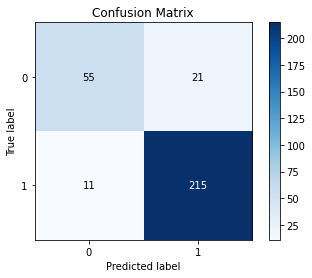

--------------------------


In [ ]:
import scikitplot
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

Y_test=Y_test
predicted= list(df_test['Model Label'])

cm = confusion_matrix(Y_test, predicted)
accuracy =accuracy_score(Y_test, predicted)
report = classification_report(Y_test, predicted)
print(report)
print('overall Accuracy:',accuracy)
scikitplot.metrics.plot_confusion_matrix(Y_test,  predicted)
plt.show()

print('--------------------------')

In [ ]:
df_test.rename(columns = {'Y or N Self-Reporting Migraine':'Manual labels'}, inplace = True)

In [ ]:
df_test['Model Label'].value_counts() #this is what model predicted

1    236
0     66
Name: Model Label, dtype: int64

In [ ]:
df_test['Manual labels'].value_counts() #this is what practitioners say

1    226
0     76
Name: Manual labels, dtype: int64

In [ ]:
df_test.to_excel(r'/content/drive/MyDrive/Reddit Migraine Dataset/Results by RoBERTa Model/roberta_predicted_test_reddit_dataset.xlsx', index = False) #Exporting the validation dataset with predictions

# Bootstrap Confidence

In [ ]:
import numpy as np

In [1]:
def evaluate(preds, labels, metric):
    res = None

    if metric == 'acc' :
        res = accuracy_score(preds, labels)
    elif metric == 'f1_macro_weighted' :
        res = f1_score(y_true=labels, y_pred=preds, average='weighted')
    elif metric == 'f1_macro' :
        res = f1_score(y_true=labels, y_pred=preds, average='macro')
    elif metric == 'f1_micro' :
        res = f1_score(y_true=labels, y_pred=preds, average='micro')
    elif metric == 'pos_class_f1' :
        #res = f1_score(y_true=labels, y_pred=preds)
        res = f1_score(y_true=labels, y_pred=preds, pos_label=1)
    elif metric == 'neg_class_f1' :
        res = f1_score(y_true=labels, y_pred=preds, pos_label=0)
    elif metric == 'f1_pmabuse' :
        cls_repo = classification_report(y_true=labels, y_pred=preds, output_dict=True)
        res = cls_repo['0']['f1-score']
    elif metric == 'f1_report' :
        cls_repo = classification_report(y_true=labels, y_pred=preds)
        print(cls_repo)
    elif metric == 'f1_report_dict' :
        cls_repo = classification_report(y_true=labels, y_pred=preds, output_dict=True)
        res = '{0:.2f}\t{1:.2f}\t{2:.2f}\t{3:.2f}'.format(cls_repo['1']['precision'], cls_repo['1']['recall'], cls_repo['1']['f1-score'], cls_repo['accuracy'])
    return res


def process(preds, labels, metric):
    pred_gold_pairs = {}
    for i, (pred, label) in enumerate(zip(preds, labels)):
        pred_gold_pairs[i] = [label, pred]

    #PREPARE FOR 1000 SIMULATONS
    simulations = []
    num_samples = 1000
    sample_size = len(pred_gold_pairs.keys())
    for c in range(num_samples):
        #random choosing with replacement
        itersample = np.random.choice(list(pred_gold_pairs.keys()), size = sample_size, replace = True)
        simulations.append(itersample)

    score_per_simul = []
    for s in simulations:
        actual = []
        pred = []
        for s_key in s:
            actual.append(pred_gold_pairs[s_key][0])
            pred.append(pred_gold_pairs[s_key][1])
        score = evaluate(pred, actual, metric)
        score_per_simul.append(score)

    #sort the results
    score_per_simul.sort()

    lower = score_per_simul[int(num_samples * 0.025) - 1]
    upper = score_per_simul[int(num_samples * 0.975) - 1]
    #print('Summary statistics:')
    #return '{0:.1f}\t{1:.1f}\t{2:.1f}\t{3:.1f}'.format(score_per_simul[int(num_samples/2)]*100, lower*100, upper*100, (upper-lower)*100/2)
    #return '{0:.1f}Â±{1:.1f}'.format(score_per_simul[int(num_samples/2)]*100, (upper-lower)*100/2)
    return lower, upper

In [2]:
metric = 'pos_class_f1'
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

df = pd.read_excel('/content/drive/MyDrive/Reddit Migraine Dataset/Results by RoBERTa Model/roberta_predicted_test_reddit_dataset.xlsx')

labels = df['Manual labels'] # Manual annotations
preds = df['Model Label'] #Model's prediction

lower, upper = process(preds, labels, metric)
print(f'{lower:.2f}-{upper:.2f}')

0.91-0.95
